<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Medicare Fraud claims Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

![Medicare](images/Medicare.jpg)

**Probelm Statement:**

*Medicare fraud increases healthcare costs through deceptive billing practices, such as false claims and duplicate submissions. 
This project analyzes Medicare claims data to identify inconsistencies, detect anomalies in provider behavior, and uncover suspicious
patterns in high-cost procedures. The findings will support insurers and regulators in strengthening fraud detection and 
improving healthcare transparency.*

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)

## Importing Datasets

In [3]:
# Load Beneficiary data
beneficiary = pd.read_csv(r"D:\Data Analytics Project\Medicare Fraud Claims Analysis Project\Medicare Fraud Claims Analysis\Datasets\beneficiary_tr.csv")

# Load Inpatient data
inpatient = pd.read_csv(r"D:\Data Analytics Project\Medicare Fraud Claims Analysis Project\Medicare Fraud Claims Analysis\Datasets\inpatient_tr.csv")

# Load Outpatient data
outpatient = pd.read_csv(r"D:\Data Analytics Project\Medicare Fraud Claims Analysis Project\Medicare Fraud Claims Analysis\Datasets\outpatient_tr.csv")

# Load Provider data
provider = pd.read_csv(r"D:\Data Analytics Project\Medicare Fraud Claims Analysis Project\Medicare Fraud Claims Analysis\Datasets\provider_tr.csv")


### Distribution of Potential Fraud in inpatient data

In [4]:
# Merge provider data with inpatient to get potential fraud for inpatient claims
inp_provider_claims = pd.merge(inpatient, provider, how = "left", on = "Provider")
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No


In [5]:
# Check shape of inpatient claims
inp_provider_claims.shape

(40474, 31)

In [6]:
# Check data types are valid in inpatient claims
inp_provider_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [7]:
inp_fraud = inp_provider_claims["PotentialFraud"].value_counts()
inp_fraud

PotentialFraud
Yes    23402
No     17072
Name: count, dtype: int64

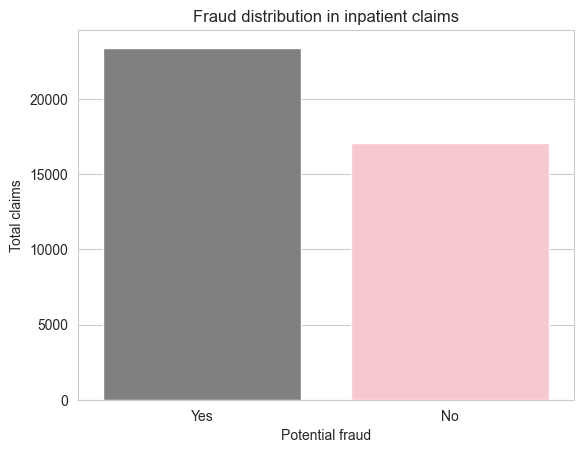

In [8]:
# Visualize fraud distribution in inpatient claims
sns.barplot(x = inp_fraud.index, y = inp_fraud.values, palette = ['grey','pink'])
plt.title("Fraud distribution in inpatient claims")
plt.xlabel("Potential fraud")
plt.ylabel("Total claims")
plt.show()

#### Insights on Fraud distribution in inpatient claims

- **Observation:**
  The number of inpatient claims labeled as potential fraud ("Yes") is higher than those labeled as not fraudulent ("No"). Approximately 23,000 claims are flagged as fraudulent, while around 17,000 are not.

- **Interpretation:**
  This indicates a significant portion of inpatient claims are suspected of fraud, suggesting either a high prevalence of fraudulent activity or possibly an aggressive fraud detection mechanism. It highlights the need for further investigation into the characteristics of these claims to refine fraud detection strategies and minimize false positives.

### Distribution of potential fraud in outpatient claims

In [9]:
# Merge provider data with outpatient to get potential fraud for outpatient claims
op_provider_claims = pd.merge(outpatient, provider, how = "left", on = "Provider")
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes


In [10]:
# Check shape of outpatient claims
op_provider_claims.shape

(517737, 28)

In [11]:
# Check data types are valid in outpatient claims
op_provider_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [12]:
op_fraud = op_provider_claims["PotentialFraud"].value_counts()
op_fraud

PotentialFraud
No     328343
Yes    189394
Name: count, dtype: int64

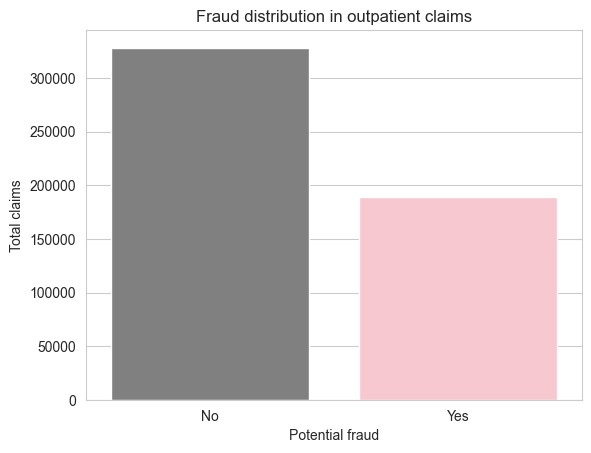

In [13]:
# Visualize fraud distribution in outpatient claims
sns.barplot(x = op_fraud.index, y = op_fraud.values, palette = ['grey','pink'])
plt.title("Fraud distribution in outpatient claims")
plt.xlabel("Potential fraud")
plt.ylabel("Total claims")
plt.show()

#### Insights on Fraud distribution in outpatient claims

- **Observation:**
  Outpatient claims with no indication of potential fraud ("No") significantly outnumber fraudulent claims ("Yes"). There are over 320,000 non-fraudulent claims compared to about 190,000 flagged as fraudulent.

- **Interpretation:**
  Unlike inpatient claims, the majority of outpatient claims are not suspected of fraud. This could suggest either a lower incidence of fraud in outpatient settings or more effective claim processing and oversight. However, the number of flagged claims is still substantial, indicating that outpatient services remain a relevant area for fraud detection efforts.

### Check for null values in inpatient claims

In [14]:
inp_provider_claims.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
PotentialFraud                0
dtype: i

### Check for null values in outpatient claims

In [15]:
op_provider_claims.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
PotentialFraud                 0
dtype: int64

### Distribution of Inpatient Insurance claim amount reimbursed

In [16]:
ip_insc_reimbursed = inp_provider_claims['InscClaimAmtReimbursed']
ip_insc_reimbursed.head()

0    26000
1     5000
2     5000
3     5000
4    10000
Name: InscClaimAmtReimbursed, dtype: int64

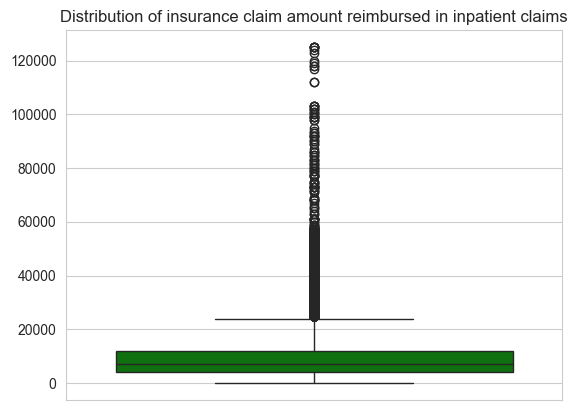

In [17]:
# Visualize insurance amount reimbursed in inpatient claims
sns.boxplot(ip_insc_reimbursed.values, color='green')
plt.title("Distribution of insurance claim amount reimbursed in inpatient claims")
plt.show()

#### Insights on insurance amount reimbursed in inpatient claims

- **Observation:**
  The majority of inpatient claims have reimbursement amounts concentrated below approximately 20,000, with a median significantly lower. There are numerous outliers extending above 30,000, with some claims exceeding 120,000.

- **Interpretation:**
  While most inpatient claims result in moderate reimbursement amounts, the presence of many high-value outliers suggests a small number of cases incur exceptionally high costs. These outliers may require further review, as they could be linked to complex medical procedures or potential fraud, especially if such high claims are frequent from the same providers.

### Inpatient claims insurance claim amount reimbursed vs Potential Fraud

In [18]:
ip_insc_reimbursed_fraud = inp_provider_claims[["InscClaimAmtReimbursed", "PotentialFraud"]]
ip_insc_reimbursed_fraud.head()

,InscClaimAmtReimbursed,PotentialFraud
0,26000,Yes
1,5000,No
2,5000,No
3,5000,No
4,10000,No


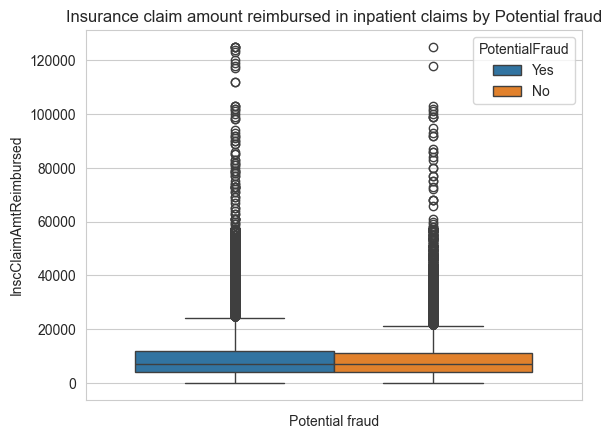

In [19]:
# Visualize total reimbursed amount in inpatient claims by potential fraud
sns.boxplot(data = ip_insc_reimbursed_fraud, y = "InscClaimAmtReimbursed", hue = "PotentialFraud")
plt.title("Insurance claim amount reimbursed in inpatient claims by Potential fraud")
plt.xlabel("Potential fraud")
plt.show()

#### Insights on insurance amount reimbursed in inpatient claims by potential fraud

- **Observation:**
  Both fraudulent ("Yes") and non-fraudulent ("No") inpatient claims have similar overall distributions, but the median reimbursement for fraudulent claims appears slightly higher. Additionally, fraudulent claims show a slightly wider interquartile range (IQR) and more high-value outliers, with several claims reimbursed above 100,000 dollars.

- **Interpretation:**
  While the core distribution of reimbursed amounts is relatively similar for both fraud categories, the higher median and increased presence of large outliers in fraudulent claims suggest that suspicious claims may be associated with higher reimbursements. This pattern may indicate intentional inflation of claim amounts in fraudulent activities and could be used as a key feature in fraud detection models.

### Distribution of Outpatient Insurance claim amount reimbursed

In [20]:
op_insc_reimbursed = op_provider_claims['InscClaimAmtReimbursed']
op_insc_reimbursed.head()

0     30
1     80
2     10
3     40
4    200
Name: InscClaimAmtReimbursed, dtype: int64

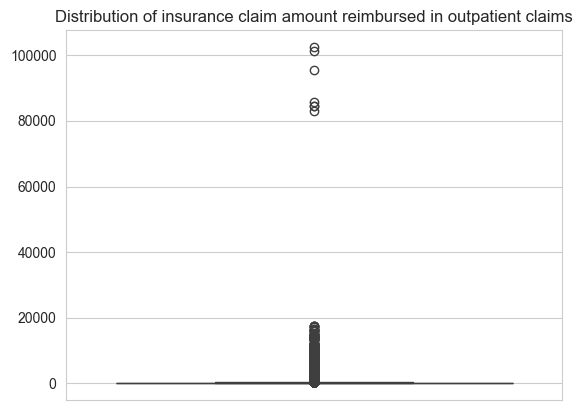

In [21]:
# Visualize insurance amount reimbursed in inpatient claims
sns.boxplot(op_insc_reimbursed.values)
plt.title("Distribution of insurance claim amount reimbursed in outpatient claims")
plt.show()

#### Insights on insurance amount reimbursed in outpatient claims

- **Observation:**
  Most outpatient claim reimbursements are tightly concentrated at lower values, with a very narrow interquartile range. However, there are a few extreme outliers, with some claims reimbursed above 80,000 and even over 100,000.

- **Interpretation:**
  Outpatient claims typically involve lower costs compared to inpatient claims, as shown by the compressed distribution. The presence of a few high-value outliers suggests exceptional cases that may involve expensive procedures or potential fraud. These anomalies warrant further analysis to verify legitimacy or refine fraud detection strategies.

### Outpatient claims insurance claim amount reimbursed vs Potential Fraud

In [22]:
op_insc_reimbursed_fraud = op_provider_claims[["InscClaimAmtReimbursed", "PotentialFraud"]]
op_insc_reimbursed_fraud.head()

,InscClaimAmtReimbursed,PotentialFraud
0,30,Yes
1,80,No
2,10,No
3,40,Yes
4,200,Yes


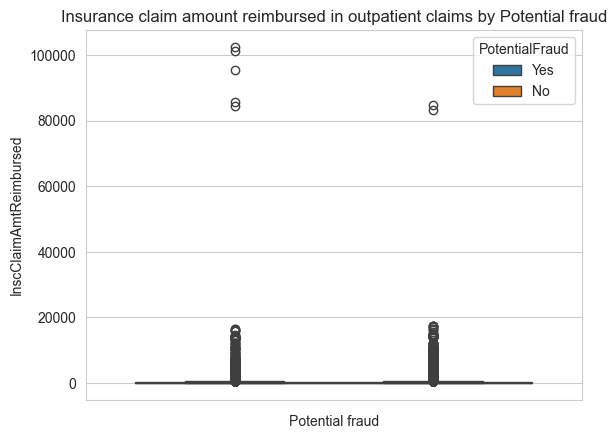

In [23]:
# Visualize total reimbursed amount in outpatient claims by potential fraud
sns.boxplot(data = op_insc_reimbursed_fraud, y = "InscClaimAmtReimbursed", hue = "PotentialFraud")
plt.title("Insurance claim amount reimbursed in outpatient claims by Potential fraud")
plt.xlabel("Potential fraud")
plt.show()

#### Insights on insurance amount reimbursed in outpatient claims by potential fraud

- **Observation:**
  Both fraudulent ("Yes") and non-fraudulent ("No") outpatient claims exhibit similar distributions with low median values and tight interquartile ranges. However, fraudulent claims include more extreme outliers, with some reimbursements exceeding 80,000, whereas non-fraudulent claims tend to have fewer and slightly lower high-value outliers.

- **Interpretation:**
  Most outpatient claims are modest in cost regardless of fraud status, but the presence of more extreme high reimbursements among fraudulent claims suggests that inflated billing may be a strategy used in fraud cases. These high-end outliers could serve as important red flags in automated fraud detection systems.

### Distribution of Deductible amount paid in inpatient claim

In [24]:
inp_provider_claims['DeductibleAmtPaid'].isnull().sum()

np.int64(899)

In [25]:
inp_provider_claims['DeductibleAmtPaid'].mean()

np.float64(1068.0)

In [26]:
inp_provider_claims['DeductibleAmtPaid'].median()

np.float64(1068.0)

In [27]:
inp_provider_claims['DeductibleAmtPaid'].mode()

0    1068.0
Name: DeductibleAmtPaid, dtype: float64

In [28]:
# Fill null values for inpatient deductible amount paid with 0 because filling null with mean, median, or mode may introduce bias
inp_provider_claims['DeductibleAmtPaid'] = inp_provider_claims['DeductibleAmtPaid'].fillna(0)

In [29]:
ip_deduct_paid = inp_provider_claims['DeductibleAmtPaid']
ip_deduct_paid.head()

0    1068.0
1    1068.0
2    1068.0
3    1068.0
4    1068.0
Name: DeductibleAmtPaid, dtype: float64

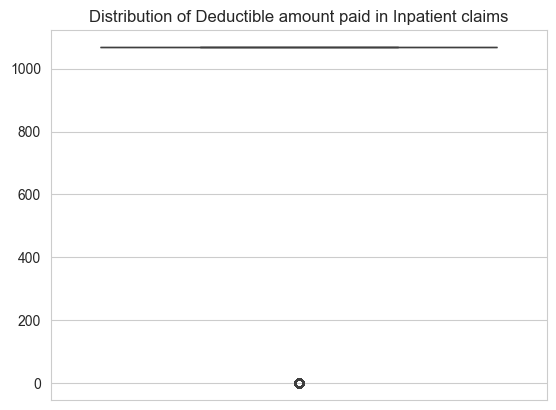

In [30]:
# Visualize deductible amount paid in inpatient claims
sns.boxplot(ip_deduct_paid.values)
plt.title("Distribution of Deductible amount paid in Inpatient claims")
plt.show()

#### Insights on deductible amount paid in inpatient claims

- **Observation:**
  The deductible amount paid in most inpatient claims is highly concentrated around a fixed high value, likely 1068. There are a few extreme low-value outliers close to zero, but the majority of the data is clustered tightly at the upper end.

- **Interpretation:**
  This uniform distribution suggests that the deductible amount for inpatient claims is often standardized, possibly due to policy norms or insurance plan structures. The presence of near-zero outliers could indicate special cases such as waived deductibles, government-funded treatments, or data entry anomalies—these could be worth deeper investigation when analyzing claim irregularities.

### Inpatient claims deductible amount paid vs Potential Fraud

In [31]:
ip_deduct_paid_fraud = inp_provider_claims[["DeductibleAmtPaid", "PotentialFraud"]]
ip_deduct_paid_fraud.head()

,DeductibleAmtPaid,PotentialFraud
0,1068.0,Yes
1,1068.0,No
2,1068.0,No
3,1068.0,No
4,1068.0,No


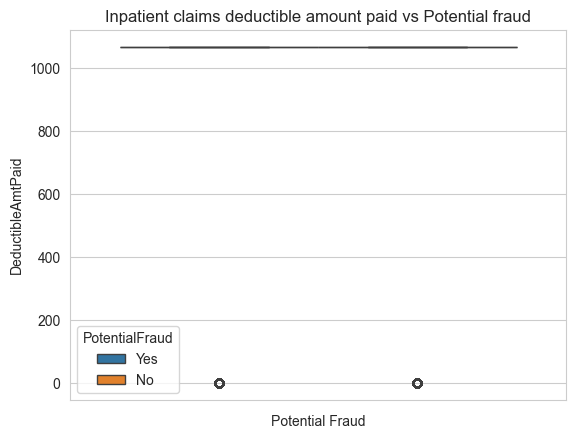

In [32]:
# Visualize deductible amount paid in inpatient claims vs potential fraud
sns.boxplot(data = ip_deduct_paid_fraud, y = "DeductibleAmtPaid", hue="PotentialFraud")
plt.title("Inpatient claims deductible amount paid vs Potential fraud")
plt.xlabel("Potential Fraud")
plt.show()

#### Insights on deductible amount paid in inpatient claims vs Potential fraud

- **Observation:**
  Both fraudulent and non-fraudulent inpatient claims show a similar distribution for deductible amounts paid, with the majority of values being very low (close to zero). A small number of outliers exist, but there's no noticeable difference between the two groups in terms of deductible amounts.

- **Interpretation:**
  Deductible amounts paid do not significantly differ between potentially fraudulent and legitimate inpatient claims. This suggests that deductible amount alone is not a strong indicator for detecting potential fraud in inpatient scenarios.

### Distribution of deductible amount paid in outpatient claims

In [33]:
op_provider_claims['DeductibleAmtPaid'].isnull().sum()

np.int64(0)

In [34]:
op_deduct_paid = op_provider_claims['DeductibleAmtPaid']
op_deduct_paid.head()

0    0
1    0
2    0
3    0
4    0
Name: DeductibleAmtPaid, dtype: int64

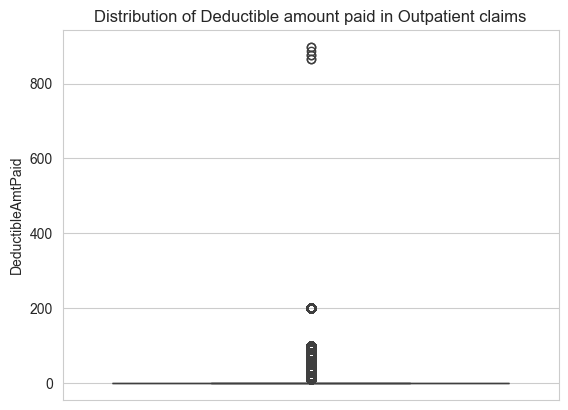

In [35]:
# Visualize deductible amount paid in outpatient claims
sns.boxplot(op_deduct_paid)
plt.title("Distribution of Deductible amount paid in Outpatient claims")
plt.show()

#### Insights on deductible amount paid in outpatient claims

- **Observation:**
  The deductible amounts in outpatient claims are mostly concentrated at very low values, close to zero. However, there are noticeable outliers where patients paid high deductible amounts—some even exceeding 800.

- **Interpretation:**
  Most outpatient claims involve minimal deductible payments, indicating limited financial burden on the patient. However, the presence of significant outliers could point to unusual billing or claim behavior, which may require further investigation, especially when cross-referenced with potential fraud indicators.

### Outpatient claims deductible amount paid vs Potential Fraud

In [36]:
op_deduct_paid_fraud = op_provider_claims[["DeductibleAmtPaid", "PotentialFraud"]]
op_deduct_paid_fraud.head()

,DeductibleAmtPaid,PotentialFraud
0,0,Yes
1,0,No
2,0,No
3,0,Yes
4,0,Yes


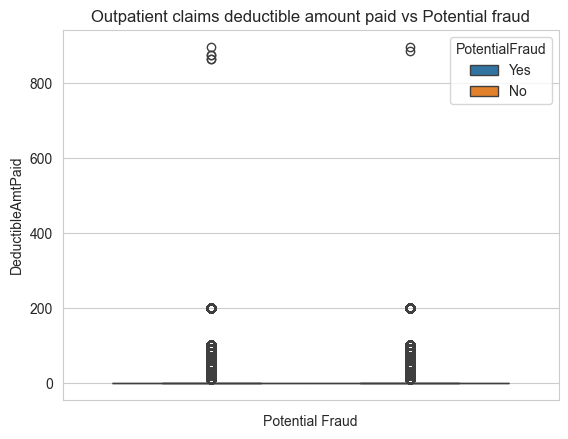

In [37]:
# Visualize deductible amount paid in outpatient claims vs potential fraud
sns.boxplot(data = op_deduct_paid_fraud, y = "DeductibleAmtPaid", hue="PotentialFraud")
plt.title("Outpatient claims deductible amount paid vs Potential fraud")
plt.xlabel("Potential Fraud")
plt.show()

#### Insights on deductible amount paid in outpatient claims vs Potential fraud

- **Observation:**
  The distribution of deductible amounts is nearly identical for both fraudulent and non-fraudulent outpatient claims. In both cases, most of the deductible amounts are clustered near zero, with a few high-value outliers (e.g., above 800).

- **Interpretation:**
  Deductible amounts do not appear to be a distinguishing factor between potentially fraudulent and legitimate outpatient claims. The similarity in distribution suggests that fraud detection may rely more on other variables (e.g., claim amount reimbursed, number of procedures, or provider behavior) rather than deductible amount paid.

### Distribution of claim duration in inpatient claims

In [38]:
inp_provider_claims['ClaimStartDt'].dtype

dtype('O')

In [39]:
inp_provider_claims['ClaimEndDt'].dtype

dtype('O')

In [40]:
inp_provider_claims['ClaimStartDt'] = pd.to_datetime(inp_provider_claims['ClaimStartDt'])
inp_provider_claims['ClaimEndDt'] = pd.to_datetime(inp_provider_claims['ClaimEndDt'])

In [41]:
# Calculate claim duration using difference of claim start date and end date
claim_date_differene = inp_provider_claims['ClaimEndDt'] - inp_provider_claims['ClaimStartDt']
inp_provider_claims['ClaimDuration'] = claim_date_differene.dt.days
ip_claim_duration = inp_provider_claims['ClaimDuration']
ip_claim_duration.head()

0     6
1     2
2     3
3     8
4    17
Name: ClaimDuration, dtype: int64

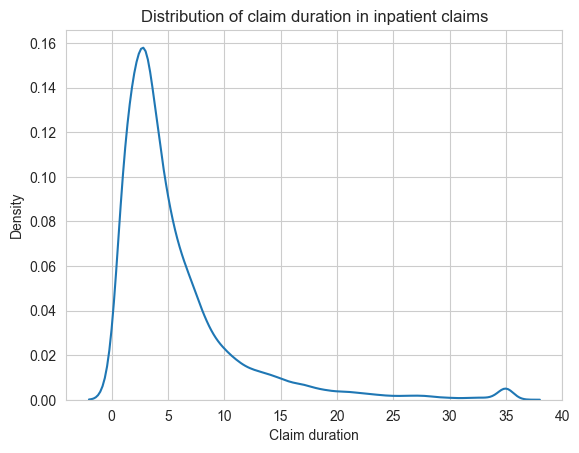

In [42]:
# Visualize claim duration in inpatient claims
sns.kdeplot(ip_claim_duration.values)
plt.title("Distribution of claim duration in inpatient claims")
plt.xlabel("Claim duration")
plt.show()

#### Insights on claim duration in inpatient claims

- **Observation:**
  The distribution of inpatient claim durations is right-skewed. Most claims have a short duration, typically between 1 to 5 days. The density decreases as duration increases, with a long tail extending beyond 30 days, indicating the presence of a few long-duration claims.

- **Interpretation:**
  The majority of inpatient claims are resolved quickly, suggesting that short hospital stays are more common. However, the presence of a long tail and occasional peaks at higher durations (e.g., around 35 days) may warrant further investigation, as unusually long durations could be linked to specific medical conditions or potentially fraudulent activity.

### Inpatient claim duration vs Potential fraud

In [43]:
ip_claim_duration_fraud = inp_provider_claims[["ClaimDuration", "PotentialFraud"]]
ip_claim_duration_fraud.head()

,ClaimDuration,PotentialFraud
0,6,Yes
1,2,No
2,3,No
3,8,No
4,17,No


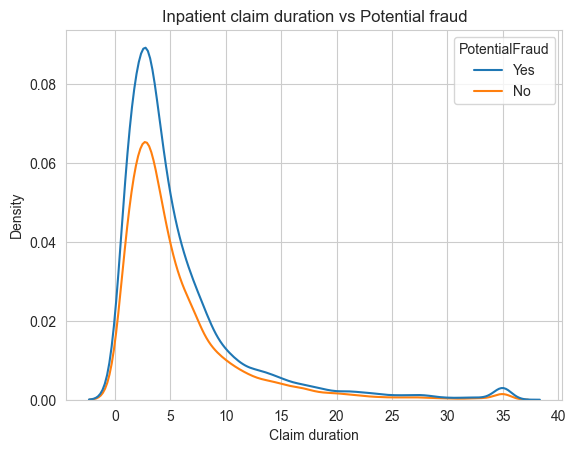

In [44]:
# Visualize claim duration in inpatient claims vs potential fraud
sns.kdeplot(data = ip_claim_duration_fraud, x = "ClaimDuration", hue = "PotentialFraud")
plt.title("Inpatient claim duration vs Potential fraud")
plt.xlabel("Claim duration")
plt.show()

#### Insights on claim duration in inpatient claims vs Potential fraud

- **Observation:**
  Both fraudulent and non-fraudulent inpatient claims exhibit a similar right-skewed distribution. However, fraudulent claims show a slightly higher peak at shorter durations (around 3–4 days) compared to non-fraudulent ones. Additionally, both groups have long tails, with a minor bump around 35 days in both cases.

- **Interpretation:**
  Fraudulent claims tend to be associated more with shorter inpatient stays, possibly indicating attempts to submit quick and frequent claims. However, the overall similarity in distribution shapes suggests that claim duration alone may not be a strong differentiator of fraud, though it can provide context when combined with other variables.

### Distribution of claim duration in outpatient claims

In [45]:
op_provider_claims['ClaimStartDt'].dtype

dtype('O')

In [46]:
op_provider_claims['ClaimEndDt'].dtype

dtype('O')

In [47]:
op_provider_claims['ClaimStartDt'] = pd.to_datetime(op_provider_claims['ClaimStartDt'])
op_provider_claims['ClaimEndDt'] = pd.to_datetime(op_provider_claims['ClaimEndDt'])

In [48]:
# Calculate claim duration using difference of claim start date and end date
claim_date_differene = op_provider_claims['ClaimEndDt'] - op_provider_claims['ClaimStartDt']
op_provider_claims['ClaimDuration'] = claim_date_differene.dt.days
op_claim_duration = op_provider_claims['ClaimDuration']
op_claim_duration.head()

0    0
1    0
2    0
3    0
4    0
Name: ClaimDuration, dtype: int64

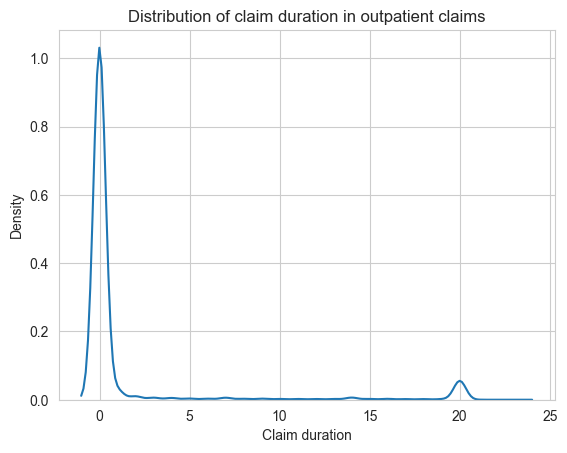

In [49]:
# Visualize claim duration in outpatient claims
sns.kdeplot(op_claim_duration.values)
plt.title("Distribution of claim duration in outpatient claims")
plt.xlabel("Claim duration")
plt.show()

#### Insights on claim duration in outpatient claims

- **Observation:**
  The majority of claim durations are clustered near 0, showing a sharp peak. The distribution tail extends toward the right (up to ~24), indicating a small number of claims with much longer durations. The highest density (most frequent claim duration) is close to 0. This suggests that most outpatient claims are processed quickly. There's a small secondary bump around 20, indicating a minor subset of claims with significantly longer durations. This may reflect exceptional or complex cases.

- **Interpretation:**
  Most outpatient claims are settled quickly, potentially within a few days or less. The long tail implies that a few claims experience extended durations, possibly due to Additional documentation or verification, Complications in diagnosis or treatment, Insurance or billing discrepancies. The sharp initial peak indicates consistency in quick processing, which could be due to Efficient claims management systems Standardized treatment protocols for outpatient services.

### Outpatient Claim duration vs Potential fraud

In [50]:
op_claim_duration_fraud = op_provider_claims[["ClaimDuration", "PotentialFraud"]]
op_claim_duration_fraud.head()

,ClaimDuration,PotentialFraud
0,0,Yes
1,0,No
2,0,No
3,0,Yes
4,0,Yes


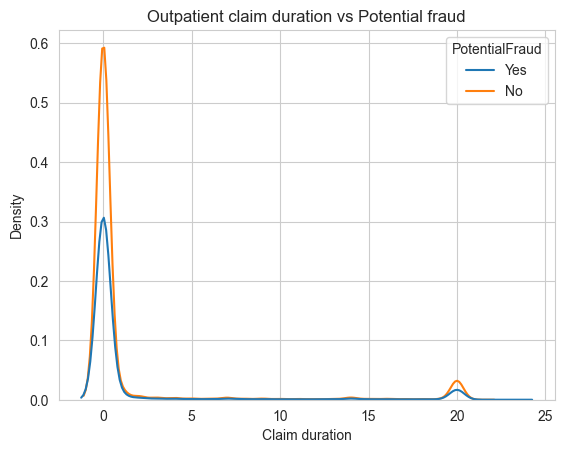

In [51]:
# Visualize claim duration in outpatient claims vs potential fraud
sns.kdeplot(data = op_claim_duration_fraud, x = "ClaimDuration", hue = "PotentialFraud")
plt.title("Outpatient claim duration vs Potential fraud")
plt.xlabel("Claim duration")
plt.show()

#### Insights on claim duration in outpatient claims vs Potential fraud

- **Observation:**
  The majority of claims (fraudulent and non-fraudulent) have short durations, with a sharp peak near 0 days. Compared to non-fraudulent claims, fraudulent ones show a wider and flatter distribution in the lower duration range, suggesting more variability in duration. Both groups show a minor peak near 20 days, but the non-fraudulent ('No') group has a sharper spike. This may indicate some legitimate long-duration processes. 

- **Interpretation:**
  Quick claims (low duration) are common in both fraudulent and non-fraudulent groups, but fraudulent claims tend to be slightly more dispersed, possibly due to Manipulation or inconsistencies in service reporting, Attempts to mimic realistic yet varied durations. Non-fraudulent claims appear more consistent and tightly packed near zero duration — this might indicate streamlined, authentic outpatient processing. The presence of a minor bump at 20 days could point to routine long-duration cases (e.g., scheduled procedures or follow-ups) that are mostly legitimate.

### Distribution of Admission duration in inpatient claims

In [52]:
inp_provider_claims['AdmissionDt'].dtype

dtype('O')

In [53]:
inp_provider_claims['DischargeDt'].dtype

dtype('O')

In [54]:
inp_provider_claims['AdmissionDt'] = pd.to_datetime(inp_provider_claims['AdmissionDt'])
inp_provider_claims['DischargeDt'] = pd.to_datetime(inp_provider_claims['DischargeDt'])

In [55]:
# Calculate claim duration using difference of claim start date and end date
admission_difference = inp_provider_claims['DischargeDt'] - inp_provider_claims['AdmissionDt']
inp_provider_claims['AdmitDuration'] = admission_difference.dt.days
ip_admission_duration = inp_provider_claims['AdmitDuration']
ip_admission_duration.head()

0     6
1     2
2     3
3     8
4    17
Name: AdmitDuration, dtype: int64

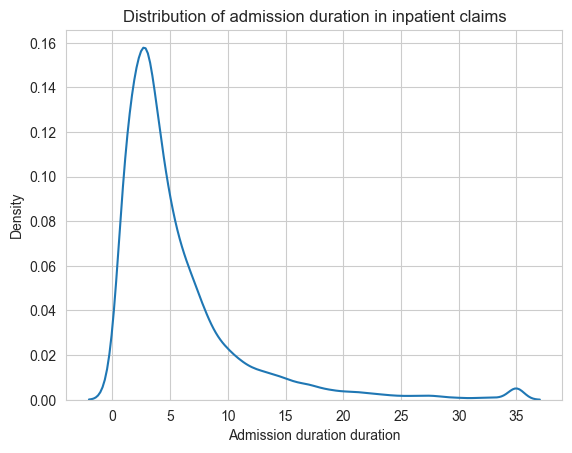

In [56]:
# Visualize admission duration in inpatient claims
sns.kdeplot(ip_admission_duration)
plt.title("Distribution of admission duration in inpatient claims")
plt.xlabel("Admission duration duration")
plt.show()

#### Insights on admission duration in inpatient claims

- **Observation:**
  Most inpatient admissions have a duration between 1 to 5 days, with a peak around 3–4 days. The frequency of claims gradually decreases as the duration increases. There is a long tail extending up to 35+ days, showing that a few inpatient cases have significantly long stays, though they are relatively rare. A minor increase in density near 35 days could suggest a specific category of long-term admissions (e.g., chronic care or rehabilitation cases).

- **Interpretation:**
  The majority of inpatient claims are for short-term hospitalizations, possibly for acute care, minor surgeries, or quick recoveries. The long tail reflects a smaller group of complex or chronic conditions requiring extended hospitalization. This distribution is expected in medical settings, where short hospital stays are the norm, and long stays are exceptions (but important to monitor).

### Inpatient admission duration vs Potential fraud

In [57]:
ip_admission_duration_fraud = inp_provider_claims[["AdmitDuration", "PotentialFraud"]]
ip_admission_duration_fraud.head()

,AdmitDuration,PotentialFraud
0,6,Yes
1,2,No
2,3,No
3,8,No
4,17,No


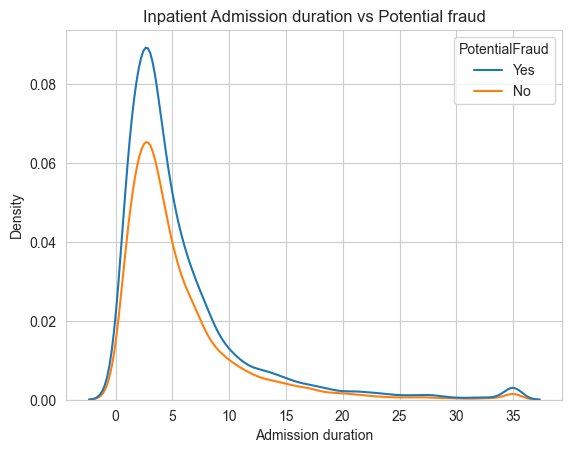

In [58]:
# Visualize admission duration in inpatient claims vs potential fraud
sns.kdeplot(data = ip_admission_duration_fraud, x = "AdmitDuration", hue = "PotentialFraud")
plt.title("Inpatient Admission duration vs Potential fraud")
plt.xlabel("Admission duration")
plt.show()

#### Insights on admission duration in inpatient claims vs Potential fraud

- **Observation:**
  Most inpatient claims (fraudulent and non-fraudulent) have short durations. The fraudulent claims ("Yes") peak is higher and slightly earlier than the non-fraudulent ("No") claims. The orange line (fraudulent) is steeper and more condensed at the beginning. Suggests that fraudulent admissions are more likely to have short lengths of stay. Both groups taper off gradually into a long tail, with a small bump near 35 days, implying both legitimate and fraudulent claims can include extended stays — though less common.

- **Interpretation:**
  Fraudulent inpatient claims tend to cluster more tightly around short durations, possibly indicating Attempts to submit frequent short stays to avoid scrutiny. Fabrication or exaggeration of short admissions that are easier to falsify. Legitimate (non-fraudulent) claims show a broader distribution, suggesting More varied and authentic treatment timelines. Greater diversity in patient care needs. Long-term stays (30+ days) do not clearly distinguish between fraud and non-fraud, implying Long admissions are not a strong standalone indicator of fraud Additional features (cost, diagnosis codes, etc.) might be needed to evaluate fraud risk in long stays.

### Top 10 Provider occuring in Inpatient claims fraudulent activities

In [59]:
fraud_inpatient_claims = inp_provider_claims[inp_provider_claims['PotentialFraud'] == 'Yes']
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,6
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes,6,6
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Yes,4,4
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,Yes,7,7
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,NaN,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,NaN,9672.0,NaN,NaN,NaN,NaN,NaN,Yes,8,8


In [60]:
top_10_ip_provider_fraud = fraud_inpatient_claims['Provider'].value_counts().reset_index()
top_10_ip_provider_fraud.columns = ["Provider", "Fraud_count"]
top_10_ip_provider_fraud = top_10_ip_provider_fraud.nlargest(10, "Fraud_count")
top_10_ip_provider_fraud.head()

,Provider,Fraud_count
0,PRV52019,516
1,PRV55462,386
2,PRV54367,322
3,PRV53706,282
4,PRV55209,275


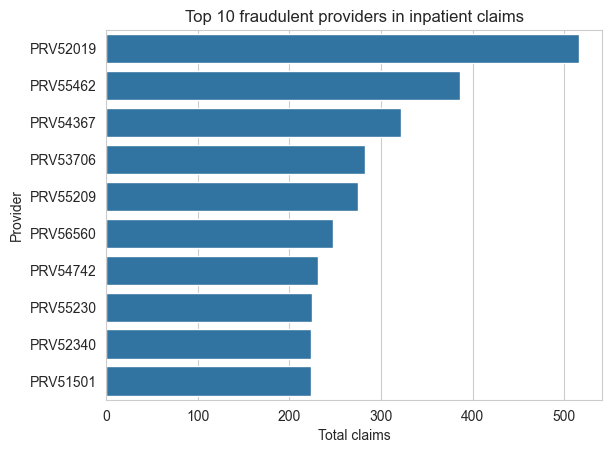

In [61]:
# Visualize top 10 fraudulent provider in inpatient claims
sns.barplot(data = top_10_ip_provider_fraud, x = "Fraud_count", y = "Provider")
plt.title("Top 10 fraudulent providers in inpatient claims")
plt.xlabel("Total claims")
plt.ylabel("Provider")
plt.show()

#### Insights on top 10 fraudulent providers in inpatient claims

- **Observation:**
  Provider PRV52019 leads significantly. This provider has over 500 fraudulent inpatient claims, far exceeding others. Indicates a disproportionate share of potentially fraudulent activity. The second and third highest providers (PRV55462 and PRV54367) have noticeably fewer claims, closer to 350 and 320 respectively. Providers ranked 4th to 10th each have around 230–280 claims, suggesting a smaller but consistent pattern of suspicious activity.

- **Interpretation:**
  PRV52019 may require immediate investigation. The high volume of fraudulent claims is an outlier and could indicate systematic fraud, such as billing for services not rendered or manipulating patient records. Providers in the middle tier (e.g., PRV54367, PRV53706, PRV55209) likely involved in moderate but consistent fraudulent behavior — possibly part of a broader trend or network. Lower-tier providers (still in top 10) Even though their numbers are lower, being in the top 10 suggests repeated red flags — these might be early indicators of emerging fraud patterns.

### Top 10 Provider occuring in Outpatient claims fraudulent activities

In [62]:
fraud_outpatient_claims = op_provider_claims[op_provider_claims['PotentialFraud'] == 'Yes']
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,0
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0


In [63]:
top_10_op_provider_fraud = fraud_outpatient_claims['Provider'].value_counts().reset_index()
top_10_op_provider_fraud.columns = ["Provider", "Fraud_count"]
top_10_op_provider_fraud = top_10_op_provider_fraud.nlargest(10, "Fraud_count")
top_10_op_provider_fraud.head()

,Provider,Fraud_count
0,PRV51459,8240
1,PRV53797,4739
2,PRV51574,4444
3,PRV53918,3588
4,PRV54895,3433


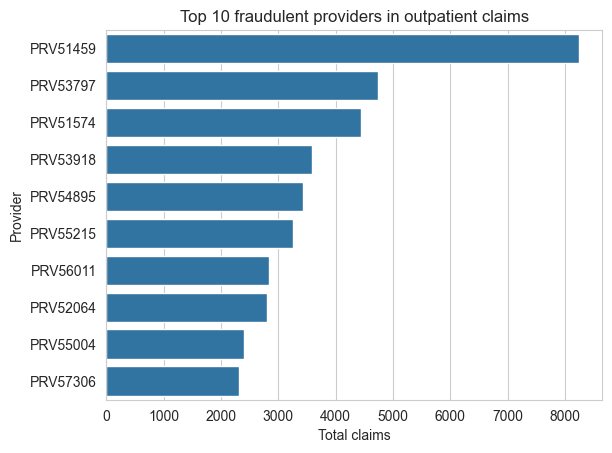

In [64]:
# Visualize top 10 fraudulent provider in outpatient claims
sns.barplot(data = top_10_op_provider_fraud, x = "Fraud_count", y = "Provider")
plt.title("Top 10 fraudulent providers in outpatient claims")
plt.xlabel("Total claims")
plt.ylabel("Provider")
plt.show()

#### Insights on top 10 fraudulent providers in outpatient claims

- **Observation:**
  PRV51459 provider submitted over 8,000 fraudulent outpatient claims, nearly double the number of the second-highest provider. Stands out as an extreme high-risk entity. Providers like PRV53797 and PRV51574 follow with around 4,500 claims, showing significant but less extreme fraudulent activity. Providers ranked 4th to 10th (PRV53918 to PRV57306) have fairly similar numbers, around 2,500–3,500 claims each. Indicates widespread but more moderate fraud among these providers.

- **Interpretation:**
  PRV51459 provider's claim volume is alarmingly high, suggesting a possible case of systematic and large-scale fraud. Potential issues: billing for non-existent patients, unnecessary procedures, or duplicate claims. Mid-tier providers (Ranks 2–5) these providers still represent major concerns, likely contributing to a large portion of outpatient fraud. May reflect aggressive or questionable billing patterns that have gone unchecked. Even the lowest in this list have over 2,000 fraudulent claims, indicating persistent fraudulent behavior.

### Top 10 providers occuring fraudulent activities in both inpatient and outpatient claims

In [65]:
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,6
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes,6,6
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Yes,4,4
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,Yes,7,7
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,NaN,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,NaN,9672.0,NaN,NaN,NaN,NaN,NaN,Yes,8,8


In [66]:
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,0
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0


In [67]:
fraud_ip_count = fraud_inpatient_claims['Provider'].value_counts().reset_index()
fraud_ip_count.columns = ['Provider', 'Fraud_IP_Count']
fraud_op_count = fraud_outpatient_claims['Provider'].value_counts().reset_index()
fraud_op_count.columns = ['Provider', 'Fraud_OP_Count']

In [68]:
combined_fraud = pd.merge(fraud_ip_count, fraud_op_count, on='Provider', how='outer')
combined_fraud = combined_fraud.fillna(0)  # Fill NaN with 0 if a provider is missing in one side
combined_fraud.head()

,Provider,Fraud_IP_Count,Fraud_OP_Count
0,PRV51003,62.0,70.0
1,PRV51005,0.0,1165.0
2,PRV51021,29.0,228.0
3,PRV51037,23.0,431.0
4,PRV51052,2.0,44.0


In [69]:
combined_fraud['Total_Fraud'] = combined_fraud['Fraud_IP_Count'] + combined_fraud['Fraud_OP_Count']
top_10_combined_fraud = combined_fraud.sort_values(by='Fraud_IP_Count', ascending=False).head(10)
top_10_combined_fraud.head()

,Provider,Fraud_IP_Count,Fraud_OP_Count,Total_Fraud
78,PRV52019,516.0,1445.0,1961.0
340,PRV55462,386.0,1521.0,1907.0
247,PRV54367,322.0,314.0,636.0
192,PRV53706,282.0,191.0,473.0
326,PRV55209,275.0,487.0,762.0


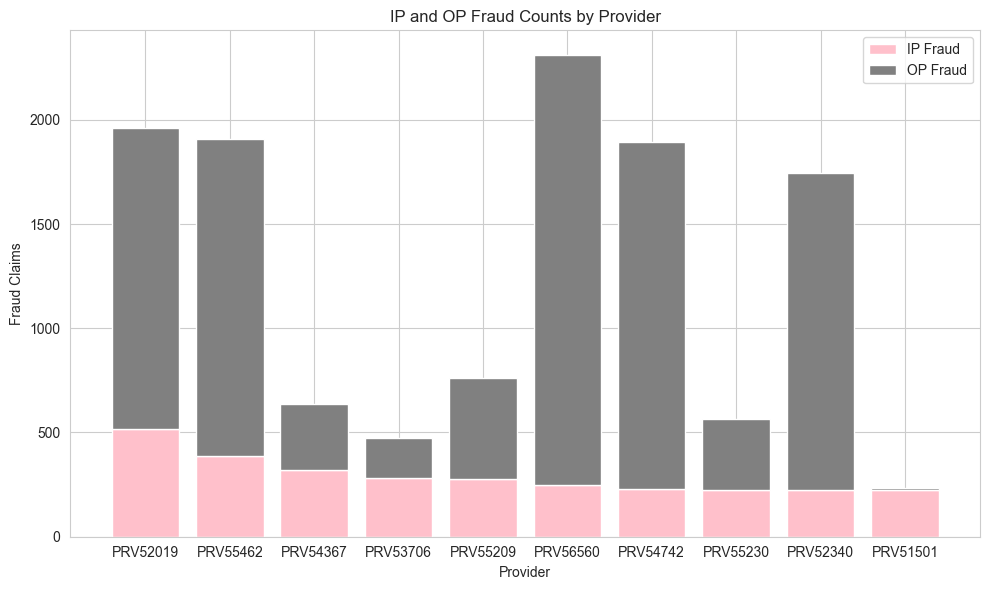

In [70]:
# Visualize Top 10 providers occuring fraudulent activities in both inpatient and outpatient claims
plt.figure(figsize=(10,6))
plt.bar(top_10_combined_fraud['Provider'], top_10_combined_fraud['Fraud_IP_Count'], label='IP Fraud', color='pink')
plt.bar(top_10_combined_fraud['Provider'], top_10_combined_fraud['Fraud_OP_Count'], bottom=top_10_combined_fraud['Fraud_IP_Count'], label='OP Fraud', color='grey')

plt.title('IP and OP Fraud Counts by Provider')
plt.xlabel('Provider')
plt.ylabel('Fraud Claims')
plt.legend()
plt.tight_layout()
plt.show()

#### Insights on top 10 fraudulent providers in both inpatient and outpatient claims

- **Observation:**
  Providers like PRV56560, PRV52019, and PRV55462 have the highest total number of fraud claims, with outpatient (OP) fraud contributing significantly more than inpatient (IP) fraud. PRV51501 has the lowest fraud claim count overall, with only inpatient fraud observed. Across all providers shown, outpatient fraud consistently exceeds inpatient fraud, often by a large margin.

- **Interpretation:**
  Outpatient fraud appears to be a more prevalent issue across providers compared to inpatient fraud, suggesting that fraudulent activities might be more easily executed or less detectable in outpatient services. This pattern also indicates that specific providers such as PRV56560 should be flagged for deeper investigation due to their disproportionately high fraud claim volume, especially from outpatient services.

### Top 10 Providers and combination of Physicians occuring in fraudulent activities in inpatient claims

In [71]:
# Check physician columns have any null values
inp_provider_claims['AttendingPhysician'].isnull().sum()

np.int64(112)

In [72]:
inp_provider_claims['OperatingPhysician'].isnull().sum()

np.int64(16644)

In [73]:
inp_provider_claims['OtherPhysician'].isnull().sum()

np.int64(35784)

In [74]:
# Fill these null values in Physician columns with No Physician becuase the blank values indicating no physicians for those claims
inp_provider_claims['AttendingPhysician'] = inp_provider_claims['AttendingPhysician'].fillna("No Attending Physician")
inp_provider_claims['OperatingPhysician'] = inp_provider_claims['OperatingPhysician'].fillna("No Operating Physician")
inp_provider_claims['OtherPhysician'] = inp_provider_claims['OtherPhysician'].fillna("No Other Physician")

In [75]:
fraud_inpatient_claims = inp_provider_claims[inp_provider_claims['PotentialFraud'] == "Yes"]
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,6
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes,6,6
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,No Other Physician,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Yes,4,4
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,No Other Physician,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,Yes,7,7
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,No Other Physician,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,NaN,9672.0,NaN,NaN,NaN,NaN,NaN,Yes,8,8


In [76]:
# Filter necessary columns
fraud_ip_combo = fraud_inpatient_claims[['Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].copy()
fraud_ip_combo.head()

,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician
0,PRV55912,PHY390922,No Operating Physician,No Other Physician
5,PRV54986,PHY402711,PHY402711,PHY402711
7,PRV51148,PHY346286,PHY405514,No Other Physician
9,PRV55215,PHY355604,PHY415867,No Other Physician
10,PRV55193,PHY397979,PHY418257,No Other Physician


In [77]:
# Exclude No Physicians
fraud_ip_combo = fraud_ip_combo[(fraud_ip_combo['AttendingPhysician'] != "No Attending Physician") &
    (fraud_ip_combo['OperatingPhysician'] != "No Operating Physician") &
    (fraud_ip_combo['OtherPhysician'] != "No Other Physician")]
fraud_ip_combo.head()

,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician
5,PRV54986,PHY402711,PHY402711,PHY402711
18,PRV54675,PHY432444,PHY380143,PHY423511
24,PRV53937,PHY360447,PHY411770,PHY357982
63,PRV52280,PHY398509,PHY398509,PHY416093
120,PRV57173,PHY312157,PHY312157,PHY373199


In [78]:
# Melt the physician roles into rows
melted_ip = fraud_ip_combo.melt(
    id_vars='Provider',
    value_vars=['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'],
    var_name='Physician_Role',
    value_name='Physician_ID'
)
melted_ip.head()

,Provider,Physician_Role,Physician_ID
0,PRV54986,AttendingPhysician,PHY402711
1,PRV54675,AttendingPhysician,PHY432444
2,PRV53937,AttendingPhysician,PHY360447
3,PRV52280,AttendingPhysician,PHY398509
4,PRV57173,AttendingPhysician,PHY312157


In [79]:
# Count combinations
provider_physician_counts = (
    melted_ip.groupby(['Provider', 'Physician_ID', 'Physician_Role'])
    .size()
    .reset_index(name='Fraud_Claim_Count')
    .sort_values(by='Fraud_Claim_Count', ascending=False)
)

# Top 10
top_provider_physician_combos = provider_physician_counts.head(10)
top_provider_physician_combos.head()

,Provider,Physician_ID,Physician_Role,Fraud_Claim_Count
464,PRV52019,PHY416093,OtherPhysician,47
1893,PRV55230,PHY333406,OtherPhysician,26
675,PRV52123,PHY361563,OtherPhysician,20
71,PRV51146,PHY429929,OtherPhysician,20
1247,PRV53712,PHY399458,OperatingPhysician,20


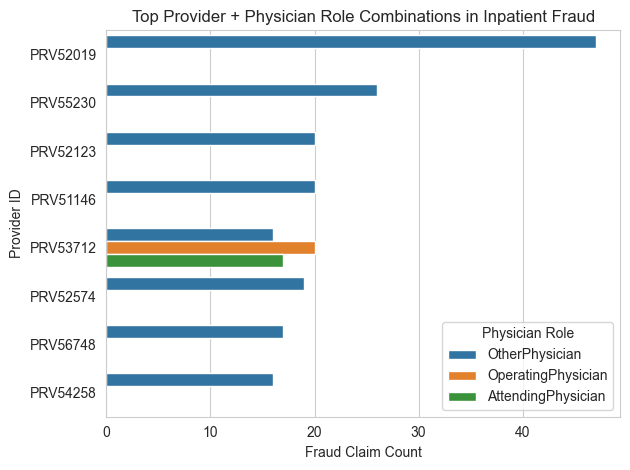

In [80]:
sns.barplot(
    data=top_provider_physician_combos,
    x='Fraud_Claim_Count',
    y='Provider',
    hue='Physician_Role'
)
plt.title('Top Provider + Physician Role Combinations in Inpatient Fraud')
plt.xlabel('Fraud Claim Count')
plt.ylabel('Provider ID')
plt.legend(title='Physician Role')
plt.tight_layout()
plt.show()

#### Insights on top provider physician combos in inpatient claims

- **Observation:**
  PRV52019 has the highest fraud claim count (nearly 50 claims), significantly more than any other provider. The majority of fraudulent claims are associated with the "OtherPhysician" role (indicated by blue bars). Only PRV53712 appears under all three physician roles OperatingPhysician (orange), AttendingPhysician (green), OtherPhysician (blue). Fraud claims involving OperatingPhysician and AttendingPhysician are much lower than those involving OtherPhysician. Providers such as PRV55230, PRV52123, and PRV51146 also have high fraud counts but only in the OtherPhysician category.

- **Interpretation:**
  The "OtherPhysician" role appears most frequently in fraud cases, suggesting that this role may be more vulnerable to misuse or lacks stringent oversight compared to the others. Providers like PRV52019 should be prioritized for audit or further investigation due to their high involvement in fraudulent claims. PRV53712 stands out as being involved in fraud across all physician roles, possibly indicating systemic issues or widespread fraudulent practices at this provider. Enhanced monitoring and control measures should target the "OtherPhysician" role. Policies should be reviewed or reinforced for providers that consistently appear in fraud statistics, particularly those with cross-role fraud.

### Top 10 Providers and combination of Physicians occuring in fraudulent activities in Outpatient claims

In [81]:
# Check physician columns have any null values
op_provider_claims['AttendingPhysician'].isnull().sum()

np.int64(1396)

In [82]:
op_provider_claims['OperatingPhysician'].isnull().sum()

np.int64(427120)

In [83]:
op_provider_claims['OtherPhysician'].isnull().sum()

np.int64(322691)

In [84]:
# Fill these null values in Physician columns with No Physician becuase the blank values indicating no physicians for those claims
op_provider_claims['AttendingPhysician'] = op_provider_claims['AttendingPhysician'].fillna("No Attending Physician")
op_provider_claims['OperatingPhysician'] = op_provider_claims['OperatingPhysician'].fillna("No Operating Physician")
op_provider_claims['OtherPhysician'] = op_provider_claims['OtherPhysician'].fillna("No Other Physician")

In [85]:
fraud_outpatient_claims = op_provider_claims[op_provider_claims['PotentialFraud'] == "Yes"]
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,0
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,No Operating Physician,No Other Physician,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,No Operating Physician,No Other Physician,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0


In [86]:
# Filter necessary columns
fraud_op_combo = fraud_outpatient_claims[['Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].copy()
fraud_op_combo.head()

,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician
0,PRV56011,PHY326117,No Operating Physician,No Other Physician
3,PRV56011,PHY334319,No Operating Physician,No Other Physician
4,PRV56011,PHY403831,No Operating Physician,No Other Physician
5,PRV56011,PHY339887,No Operating Physician,No Other Physician
6,PRV56011,PHY345721,No Operating Physician,No Other Physician


In [87]:
# Exclude No Physicians
fraud_op_combo = fraud_op_combo[(fraud_op_combo['AttendingPhysician'] != "No Attending Physician") &
    (fraud_op_combo['OperatingPhysician'] != "No Operating Physician") &
    (fraud_op_combo['OtherPhysician'] != "No Other Physician")]
fraud_op_combo.head()

,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician
104,PRV57117,PHY380166,PHY422208,PHY422208
130,PRV53808,PHY373825,PHY373825,PHY373825
153,PRV56575,PHY428881,PHY370419,PHY327236
210,PRV53895,PHY333735,PHY333735,PHY333735
256,PRV51836,PHY433436,PHY433436,PHY313818


In [88]:
# Melt the physician roles into rows
melted_op = fraud_op_combo.melt(
    id_vars='Provider',
    value_vars=['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'],
    var_name='Physician_Role',
    value_name='Physician_ID'
)
melted_op.head()

,Provider,Physician_Role,Physician_ID
0,PRV57117,AttendingPhysician,PHY380166
1,PRV53808,AttendingPhysician,PHY373825
2,PRV56575,AttendingPhysician,PHY428881
3,PRV53895,AttendingPhysician,PHY333735
4,PRV51836,AttendingPhysician,PHY433436


In [89]:
# Count combinations
provider_physician_counts_op = (
    melted_op.groupby(['Provider', 'Physician_ID', 'Physician_Role'])
    .size()
    .reset_index(name='Fraud_Claim_Count')
    .sort_values(by='Fraud_Claim_Count', ascending=False)
)

# Top 10
top_provider_physician_combos_op = provider_physician_counts_op.head(10)
top_provider_physician_combos_op.head()

,Provider,Physician_ID,Physician_Role,Fraud_Claim_Count
4812,PRV53797,PHY412132,OtherPhysician,269
770,PRV51459,PHY341578,OtherPhysician,220
765,PRV51459,PHY337425,OtherPhysician,208
767,PRV51459,PHY338032,OtherPhysician,207
5038,PRV53918,PHY330576,OperatingPhysician,195


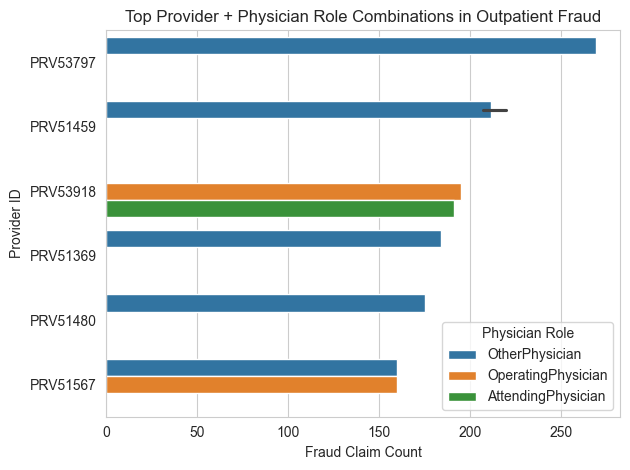

In [90]:
sns.barplot(
    data=top_provider_physician_combos_op,
    x='Fraud_Claim_Count',
    y='Provider',
    hue='Physician_Role'
)
plt.title('Top Provider + Physician Role Combinations in Outpatient Fraud')
plt.xlabel('Fraud Claim Count')
plt.ylabel('Provider ID')
plt.legend(title='Physician Role')
plt.tight_layout()
plt.show()

#### Insights on top provider physician combos in outpatient claims

- **Observation:**
  PRV53797 has the highest fraud claim count, with over 270 fraudulent outpatient claims — the most across all providers in this chart. As in the inpatient fraud chart, "OtherPhysician" (blue bars) is the most common role associated with fraudulent outpatient claims. PRV53918 shows substantial fraud counts for OperatingPhysician (orange) and AttendingPhysician (green), both close to 200 claims each. PRV51567 is the only other provider besides PRV53918 involved in more than one physician role (Operating and Other). Most providers listed have significant fraud counts only under the OtherPhysician role.

- **Interpretation:**
  PRV53797 should be considered a major red flag due to its extremely high fraudulent outpatient activity. This provider warrants urgent investigation. PRV53918 stands out because it has nearly equal fraud claim counts in both OperatingPhysician and AttendingPhysician roles. This may point to collusion or systemic issues across roles at this provider. Just like with inpatient fraud, the "OtherPhysician" role continues to dominate in outpatient fraud. This suggests a possible lack of accountability or clearer definition for this role. Strengthening controls and audits around the "OtherPhysician" role is critical. Providers with multi-role fraud involvement, like PRV53918 and PRV51567, should be evaluated for internal controls, billing practices, and staff behavior.

### Diagnosis pattern in fraudulent inpatient claims

In [91]:
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No,2,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No,8,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No,17,17


In [92]:
inp_provider_claims.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'PotentialFraud', 'ClaimDuration',
       'AdmitDuration'],
      dtype='object')

In [93]:
inp_provider_claims['ClmDiagnosisCode_1'].isnull().sum()

np.int64(0)

In [94]:
inp_provider_claims['ClmDiagnosisCode_2'].isnull().sum()

np.int64(226)

In [95]:
inp_provider_claims['ClmDiagnosisCode_3'].isnull().sum()

np.int64(676)

In [96]:
inp_provider_claims['ClmDiagnosisCode_4'].isnull().sum()

np.int64(1534)

In [97]:
inp_provider_claims['ClmDiagnosisCode_5'].isnull().sum()

np.int64(2894)

In [98]:
inp_provider_claims['ClmDiagnosisCode_6'].isnull().sum()

np.int64(4838)

In [99]:
inp_provider_claims['ClmDiagnosisCode_7'].isnull().sum()

np.int64(7258)

In [100]:
inp_provider_claims['ClmDiagnosisCode_8'].isnull().sum()

np.int64(9942)

In [101]:
inp_provider_claims['ClmDiagnosisCode_9'].isnull().sum()

np.int64(13497)

In [102]:
inp_provider_claims['ClmDiagnosisCode_10'].isnull().sum()

np.int64(36547)

In [108]:
# The null values in diagnosis columns indicating no diagnosis billed for the claim
# So fill the null for diagnosis columns with No diagnosis will be meaningful
inp_provider_claims['ClmDiagnosisCode_2'] = inp_provider_claims['ClmDiagnosisCode_2'].fillna("No_diagnosis_2")
inp_provider_claims['ClmDiagnosisCode_3'] = inp_provider_claims['ClmDiagnosisCode_3'].fillna("No_diagnosis_3")
inp_provider_claims['ClmDiagnosisCode_4'] = inp_provider_claims['ClmDiagnosisCode_4'].fillna("No_diagnosis_4")
inp_provider_claims['ClmDiagnosisCode_5'] = inp_provider_claims['ClmDiagnosisCode_5'].fillna("No_diagnosis_5")
inp_provider_claims['ClmDiagnosisCode_6'] = inp_provider_claims['ClmDiagnosisCode_6'].fillna("No_diagnosis_6")
inp_provider_claims['ClmDiagnosisCode_7'] = inp_provider_claims['ClmDiagnosisCode_7'].fillna("No_diagnosis_7")
inp_provider_claims['ClmDiagnosisCode_8'] = inp_provider_claims['ClmDiagnosisCode_8'].fillna("No_diagnosis_8")
inp_provider_claims['ClmDiagnosisCode_9'] = inp_provider_claims['ClmDiagnosisCode_9'].fillna("No_diagnosis_9")
inp_provider_claims['ClmDiagnosisCode_10'] = inp_provider_claims['ClmDiagnosisCode_3'].fillna("No_diagnosis_10")

In [109]:
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,56400,7092.0,NaN,NaN,NaN,NaN,NaN,No,2,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,71690,NaN,NaN,NaN,NaN,NaN,NaN,No,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,7843,331.0,NaN,NaN,NaN,NaN,NaN,No,8,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,34400,3893.0,NaN,NaN,NaN,NaN,NaN,No,17,17


In [110]:
fraud_inpatient_claims = inp_provider_claims[inp_provider_claims['PotentialFraud'] == "Yes"]
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,6
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,78702,863.0,NaN,NaN,NaN,NaN,NaN,Yes,6,6
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,No Other Physician,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,30000,9904.0,NaN,NaN,NaN,NaN,NaN,Yes,4,4
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,No Other Physician,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,V851,3612.0,4139.0,NaN,NaN,NaN,NaN,Yes,7,7
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,No Other Physician,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,78552,9672.0,NaN,NaN,NaN,NaN,NaN,Yes,8,8


In [115]:
# Select all diagnosis code columns (e.g., ClaimDiagnosisCode_1 to _10)
diagnosis_cols = [col for col in fraud_inpatient_claims.columns if col.startswith('ClmDiagnosisCode_')]

# Flatten into a single column
all_diag_codes = pd.melt(
    fraud_inpatient_claims[diagnosis_cols],
    value_name='Diagnosis_Code'
)

# Count frequencies
top_diag_codes = (
    all_diag_codes['Diagnosis_Code']
    .value_counts()
    .reset_index()
    .head(10)
)
top_diag_codes.columns = ['Diagnosis_Code', 'Frequency']
top_diag_codes.head()

,Diagnosis_Code,Frequency
0,4019,9334
1,No_diagnosis_9,7736
2,No_diagnosis_8,5692
3,25000,4865
4,2724,4821


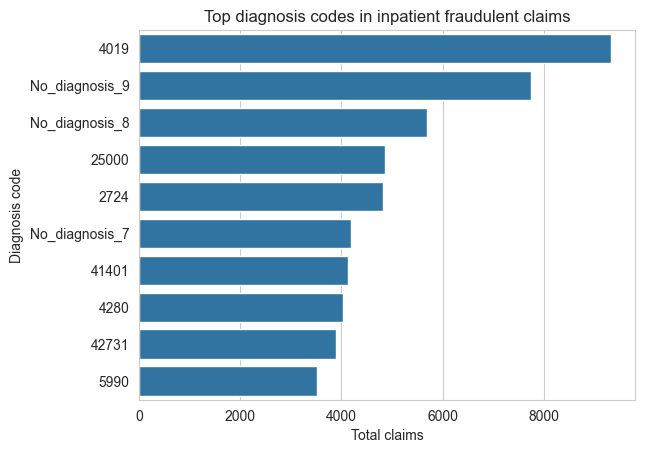

In [117]:
# Visualize top diagnosis codes
sns.barplot(data = top_diag_codes, x = "Frequency", y = "Diagnosis_Code")
plt.title("Top diagnosis codes in inpatient fraudulent claims")
plt.xlabel("Total claims")
plt.ylabel("Diagnosis code")
plt.show()

#### Insights on top diagnosis combos in inpatient fraud claims

- **Observation:**
  Diagnosis code 4019 is the most frequent in fraudulent inpatient claims, with nearly 9,500 total claims — significantly higher than any other code. The next three highest entries include No_diagnosis_9, No_diagnosis_8, Diagnosis code 25000. Three of the top ten entries are labeled as "No_diagnosis_", indicating missing or unspecified diagnosis data. Other notable diagnosis codes with high fraudulent claim counts include 25000 (likely related to diabetes mellitus), 2724 (possibly linked to lipid metabolism disorders), 41401, 4280, 42731, and 5990 — all standard diagnosis codes seen in clinical settings.

- **Interpretation:**
  4019 (which commonly refers to Essential Hypertension) appears to be the most frequently exploited diagnosis code in fraudulent claims, possibly due to its high prevalence and ambiguity, making it easier to misuse. The presence of No_diagnosis_7, 8, and 9 suggests a systemic issue in coding practices — either due to poor documentation or intentional omission to bypass automated fraud detection. These unspecified entries make it harder to validate medical necessity, which could be a tactic to obscure fraudulent activity. Many of the named diagnosis codes (e.g., 25000, 4280, 41401) relate to chronic diseases like diabetes, heart failure, and cardiovascular conditions. These conditions are frequently reimbursed and might be targeted for fraud because they’re common and sometimes lack definitive diagnostic criteria. Diagnosis codes such as 4019 and the “No_diagnosis” categories should be prioritized for deeper auditing and validation, especially when tied to high-cost inpatient procedures or repeated claims.

### Diagnosis pattern in fraudulent outpatient claims

In [118]:
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,No Operating Physician,No Other Physician,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,No Operating Physician,No Other Physician,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,0


In [119]:
op_provider_claims.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'PotentialFraud', 'ClaimDuration'],
      dtype='object')

In [120]:
op_provider_claims['ClmDiagnosisCode_1'].isnull().sum()

np.int64(10453)

In [121]:
op_provider_claims['ClmDiagnosisCode_2'].isnull().sum()

np.int64(195380)

In [122]:
op_provider_claims['ClmDiagnosisCode_3'].isnull().sum()

np.int64(314480)

In [123]:
op_provider_claims['ClmDiagnosisCode_4'].isnull().sum()

np.int64(392141)

In [124]:
op_provider_claims['ClmDiagnosisCode_5'].isnull().sum()

np.int64(443393)

In [125]:
op_provider_claims['ClmDiagnosisCode_6'].isnull().sum()

np.int64(468981)

In [126]:
op_provider_claims['ClmDiagnosisCode_7'].isnull().sum()

np.int64(484776)

In [127]:
op_provider_claims['ClmDiagnosisCode_8'].isnull().sum()

np.int64(494825)

In [128]:
op_provider_claims['ClmDiagnosisCode_9'].isnull().sum()

np.int64(502899)

In [129]:
op_provider_claims['ClmDiagnosisCode_10'].isnull().sum()

np.int64(516654)

In [130]:
# The null values in diagnosis columns indicating no diagnosis billed for the claim
# So fill the null for diagnosis columns with No diagnosis will be meaningful
op_provider_claims['ClmDiagnosisCode_1'] = op_provider_claims['ClmDiagnosisCode_1'].fillna("No_diagnosis_1")
op_provider_claims['ClmDiagnosisCode_2'] = op_provider_claims['ClmDiagnosisCode_2'].fillna("No_diagnosis_2")
op_provider_claims['ClmDiagnosisCode_3'] = op_provider_claims['ClmDiagnosisCode_3'].fillna("No_diagnosis_3")
op_provider_claims['ClmDiagnosisCode_4'] = op_provider_claims['ClmDiagnosisCode_4'].fillna("No_diagnosis_4")
op_provider_claims['ClmDiagnosisCode_5'] = op_provider_claims['ClmDiagnosisCode_5'].fillna("No_diagnosis_5")
op_provider_claims['ClmDiagnosisCode_6'] = op_provider_claims['ClmDiagnosisCode_6'].fillna("No_diagnosis_6")
op_provider_claims['ClmDiagnosisCode_7'] = op_provider_claims['ClmDiagnosisCode_7'].fillna("No_diagnosis_7")
op_provider_claims['ClmDiagnosisCode_8'] = op_provider_claims['ClmDiagnosisCode_8'].fillna("No_diagnosis_8")
op_provider_claims['ClmDiagnosisCode_9'] = op_provider_claims['ClmDiagnosisCode_9'].fillna("No_diagnosis_9")
op_provider_claims['ClmDiagnosisCode_10'] = op_provider_claims['ClmDiagnosisCode_3'].fillna("No_diagnosis_10")

In [131]:
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,No Operating Physician,No Other Physician,6115,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,No Operating Physician,No Other Physician,2723,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,0


In [132]:
fraud_outpatient_claims = op_provider_claims[op_provider_claims['PotentialFraud'] == "Yes"]
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,0
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,No Operating Physician,No Other Physician,20381,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,No Operating Physician,No Other Physician,V6546,4280,2449,V854,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,2449,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0


In [137]:
# Select all diagnosis code columns (e.g., ClaimDiagnosisCode_1 to _10)
diagnosis_cols = [col for col in fraud_outpatient_claims.columns if col.startswith('ClmDiagnosisCode_')]

# Flatten into a single column
all_diag_codes = pd.melt(
    fraud_outpatient_claims[diagnosis_cols],
    value_name='Diagnosis_Code'
)

# Count frequencies
top_diag_codes_op = (
    all_diag_codes['Diagnosis_Code']
    .value_counts()
    .reset_index()
    .head(10)
)
top_diag_codes_op.columns = ['Diagnosis_Code', 'Frequency']
top_diag_codes_op.head()

,Diagnosis_Code,Frequency
0,No_diagnosis_3,230378
1,No_diagnosis_9,183943
2,No_diagnosis_8,180996
3,No_diagnosis_7,177330
4,No_diagnosis_6,171632


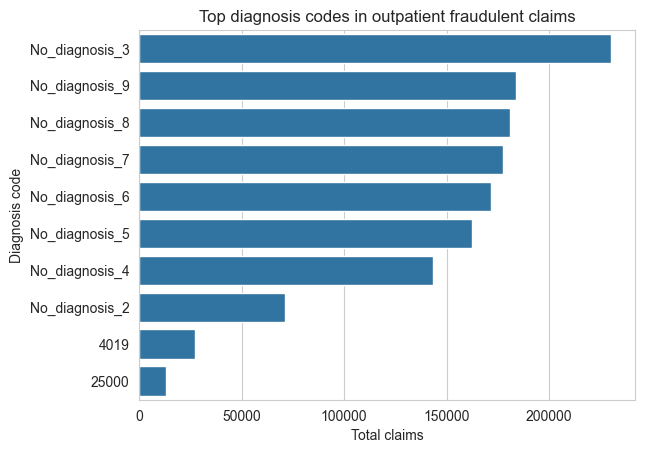

In [138]:
# Visualize top diagnosis codes
sns.barplot(data = top_diag_codes_op, x = "Frequency", y = "Diagnosis_Code")
plt.title("Top diagnosis codes in outpatient fraudulent claims")
plt.xlabel("Total claims")
plt.ylabel("Diagnosis code")
plt.show()

#### Insights on top diagnosis combos in otupatient fraud claims

- **Observation:**
  No_diagnosis_3 appears in the highest number of fraudulent outpatient claims (~230,000 claims). It is significantly higher than all other codes, suggesting an outlier in frequency. The top 8 codes are all labeled as 'No_diagnosis_X', implying a possible pattern of missing or unclear diagnosis information in fraudulent claims. This could indicate intentional omission or manipulation of diagnosis data. After 'No_diagnosis_2', there's a significant drop in the number of claims associated with the next codes (‘4019’ and ‘25000’), which appear to be valid ICD diagnosis codes. These two codes have far fewer associated fraudulent claims compared to the top 8. '4019' (likely representing essential hypertension) and '25000' (diabetes mellitus) are actual ICD-9 codes and are among the least frequent in this list of fraudulent claims.

- **Interpretation:**
  The use of 'No_diagnosis_X' placeholders strongly suggests that fraudsters might be intentionally omitting or masking real diagnosis codes to avoid detection or scrutiny. The overwhelming use of non-specific codes in fraudulent claims presents an opportunity for building rule-based or machine learning models that flag claims with such diagnosis patterns. This trend highlights a need for stricter validation of diagnosis information in outpatient claims to detect and prevent fraud more effectively. Analyzing the provider or facility details linked to these codes could help identify sources or clusters of fraudulent activity.

### Procedure code pattern in inpatient fraudulent claims

In [140]:
inp_provider_claims.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'PotentialFraud', 'ClaimDuration',
       'AdmitDuration'],
      dtype='object')

In [142]:
inp_provider_claims['ClmProcedureCode_1'].isnull().sum()

np.int64(17326)

In [143]:
inp_provider_claims['ClmProcedureCode_2'].isnull().sum()

np.int64(35020)

In [144]:
inp_provider_claims['ClmProcedureCode_3'].isnull().sum()

np.int64(39509)

In [145]:
inp_provider_claims['ClmProcedureCode_4'].isnull().sum()

np.int64(40358)

In [146]:
inp_provider_claims['ClmProcedureCode_5'].isnull().sum()

np.int64(40465)

In [147]:
inp_provider_claims['ClmProcedureCode_6'].isnull().sum()

np.int64(40474)

In [148]:
# The null values in proceudre columns indicating no procedures billed for the claim
# So fill the null for procedure columns with No procedure will be meaningful
inp_provider_claims['ClmProcedureCode_1'] = inp_provider_claims['ClmProcedureCode_1'].fillna("No_Procedure_1")
inp_provider_claims['ClmProcedureCode_2'] = inp_provider_claims['ClmProcedureCode_2'].fillna("No_Procedure_2")
inp_provider_claims['ClmProcedureCode_3'] = inp_provider_claims['ClmProcedureCode_3'].fillna("No_Procedure_3")
inp_provider_claims['ClmProcedureCode_4'] = inp_provider_claims['ClmProcedureCode_4'].fillna("No_Procedure_4")
inp_provider_claims['ClmProcedureCode_5'] = inp_provider_claims['ClmProcedureCode_5'].fillna("No_Procedure_5")
inp_provider_claims['ClmProcedureCode_6'] = inp_provider_claims['ClmProcedureCode_6'].fillna("No_Procedure_6")

In [149]:
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,56400,7092.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,2,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,71690,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,7843,331.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,8,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,34400,3893.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,17,17


In [150]:
fraud_inpatient_claims = inp_provider_claims[inp_provider_claims['PotentialFraud'] == "Yes"]
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,78702,863.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,No Other Physician,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,30000,9904.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,4,4
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,No Other Physician,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,V851,3612.0,4139.0,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,7,7
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,No Other Physician,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,78552,9672.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,8,8


In [151]:
# Select all procedure code columns (e.g., ProcedureCode_1 to _6)
procedure_cols = [col for col in fraud_inpatient_claims.columns if col.startswith('ClmProcedureCode_')]

# Flatten into a single column
all_proc_codes = pd.melt(
    fraud_inpatient_claims[procedure_cols],
    value_name='Procedure_Code'
)

# Count frequencies
top_proc_codes = (
    all_proc_codes['Procedure_Code']
    .value_counts()
    .reset_index()
    .head(10)
)
top_proc_codes.columns = ['Procedure_code', 'Frequency']
top_proc_codes.head()

,Procedure_code,Frequency
0,No_Procedure_6,23402
1,No_Procedure_5,23396
2,No_Procedure_4,23327
3,No_Procedure_3,22842
4,No_Procedure_2,20173


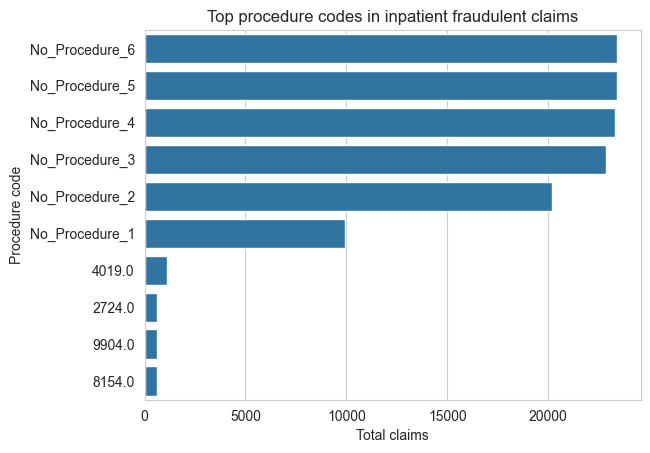

In [152]:
# Visualize top procedure codes in inpatient fraudulent claims
sns.barplot(data = top_proc_codes, x = "Frequency", y = "Procedure_code")
plt.title("Top procedure codes in inpatient fraudulent claims")
plt.xlabel("Total claims")
plt.ylabel("Procedure code")
plt.show()

#### Insights on top procedure combos in inpatient fraud claims

- **Observation:**
  The top 6 procedure codes are all labeled as No_Procedure_X, each having between 10,000 to 23,000 claims. No_Procedure_6 has the highest number of fraudulent inpatient claims. At the bottom, valid procedure codes like 4019.0, 2724.0, 9904.0, and 8154.0 appear, but they have very few associated claims (less than 2,000 each). There is a steep drop from No_Procedure_1 to the first valid procedure code, indicating a major skew toward placeholder or missing procedure codes in fraudulent activity.

- **Interpretation:**
  The heavy use of non-descriptive No_Procedure_X entries suggests fraudulent claims are often submitted without actual procedures listed, likely to bypass validation or avoid red flags. This pattern might reflect manipulation or exploitation of system weaknesses in how inpatient procedures are logged or processed in claims. Claims containing No_Procedure codes, especially in inpatient settings where procedures are typically required, can serve as a strong indicator of fraud. Regulatory and healthcare organizations should improve audits and enforcement to ensure legitimate procedure codes are used, especially in high-cost inpatient care. Comparing the provider, facility, or patient characteristics behind these No_Procedure entries could help identify fraud patterns or common sources.

### Procedure code pattern in outpatient fraudulent claims

In [153]:
op_provider_claims.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'PotentialFraud', 'ClaimDuration'],
      dtype='object')

In [157]:
op_provider_claims.shape

(517737, 29)

In [154]:
op_provider_claims['ClmProcedureCode_1'].isnull().sum()

np.int64(517575)

In [155]:
op_provider_claims['ClmProcedureCode_2'].isnull().sum()

np.int64(517701)

In [156]:
op_provider_claims['ClmProcedureCode_3'].isnull().sum()

np.int64(517733)

In [158]:
op_provider_claims['ClmProcedureCode_4'].isnull().sum()

np.int64(517735)

In [159]:
op_provider_claims['ClmProcedureCode_5'].isnull().sum()

np.int64(517737)

In [160]:
op_provider_claims['ClmProcedureCode_6'].isnull().sum()

np.int64(517737)

In [161]:
# The null values in proceudre columns indicating no procedures billed for the claim
# So fill the null for procedure columns with No procedure will be meaningful
op_provider_claims['ClmProcedureCode_1'] = op_provider_claims['ClmProcedureCode_1'].fillna("No_Procedure_1")
op_provider_claims['ClmProcedureCode_2'] = op_provider_claims['ClmProcedureCode_2'].fillna("No_Procedure_2")
op_provider_claims['ClmProcedureCode_3'] = op_provider_claims['ClmProcedureCode_3'].fillna("No_Procedure_3")
op_provider_claims['ClmProcedureCode_4'] = op_provider_claims['ClmProcedureCode_4'].fillna("No_Procedure_4")
op_provider_claims['ClmProcedureCode_5'] = op_provider_claims['ClmProcedureCode_5'].fillna("No_Procedure_5")
op_provider_claims['ClmProcedureCode_6'] = op_provider_claims['ClmProcedureCode_6'].fillna("No_Procedure_6")

In [162]:
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,No Operating Physician,No Other Physician,6115,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,79380,No,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,No Operating Physician,No Other Physician,2723,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,No,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0


In [163]:
fraud_outpatient_claims = op_provider_claims[op_provider_claims['PotentialFraud'] == "Yes"]
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,No Operating Physician,No Other Physician,20381,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,No Operating Physician,No Other Physician,V6546,4280,2449,V854,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,2449,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0


In [168]:
# Select all procedure code columns (e.g., ProcedureCode_1 to _6)
procedure_cols = [col for col in fraud_outpatient_claims.columns if col.startswith('ClmProcedureCode_')]

# Flatten into a single column
all_proc_codes = pd.melt(
    fraud_outpatient_claims[procedure_cols],
    value_name='Procedure_Code'
)

# Count frequencies
top_proc_codes_op = (
    all_proc_codes['Procedure_Code']
    .value_counts()
    .reset_index()
    .head(10)
)
top_proc_codes_op.columns = ['Procedure_code', 'Frequency']
top_proc_codes_op.head()

,Procedure_code,Frequency
0,No_Procedure_6,189394
1,No_Procedure_5,189394
2,No_Procedure_4,189393
3,No_Procedure_3,189391
4,No_Procedure_2,189377


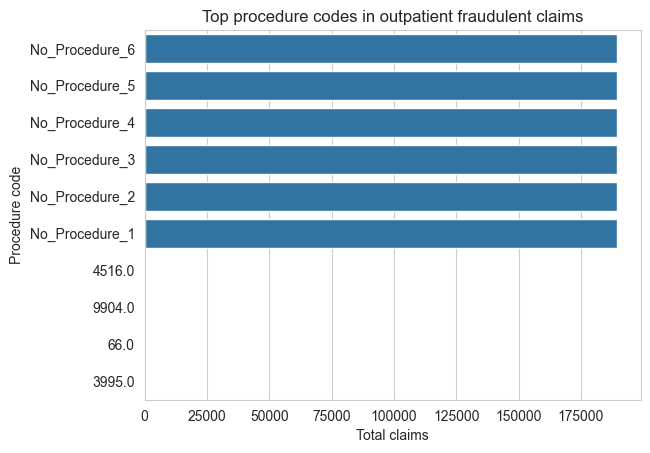

In [166]:
# Visualize top procedure codes in inpatient fraudulent claims
sns.barplot(data = top_proc_codes_op, x = "Frequency", y = "Procedure_code")
plt.title("Top procedure codes in outpatient fraudulent claims")
plt.xlabel("Total claims")
plt.ylabel("Procedure code")
plt.show()

#### Insights on top procedure combos in outpatient fraud claims

- **Observation:**
  All of the top six procedure codes are labeled as No_Procedure_1 through No_Procedure_6. Each of these has a very high and nearly identical count, close to 180,000 claims. Valid procedure codes like 4516.0, 9904.0, 66.0, and 3995.0 have extremely low frequencies in comparison (barely visible on the chart). The bar heights of all No_Procedure_X entries are nearly the same, suggesting systematic or automated fraudulent behavior involving these placeholders. 

- **Interpretation:**
  The dominance of No_Procedure entries in outpatient fraudulent claims strongly suggests that procedure details are either being omitted deliberately or that fabricated claims are submitted with dummy or missing codes to bypass validation. The uniform distribution across No_Procedure_1 to No_Procedure_6 implies either a common template or automation being used to submit false outpatient claims without genuine procedure documentation. Claims with such non-descriptive codes should be prioritized for audit. In real outpatient services, at least one valid procedure is usually present—making these No_Procedure codes a strong anomaly. The negligible presence of actual codes shows that fraudulent outpatient claims are not even attempting to mimic legitimate ones by using plausible procedures, which makes them easier to flag.

### Top diagnosis and procedure combos in inpatient fraudulent claims

In [169]:
from itertools import product

# Convert diagnosis and procedure codes into lists per row
fraud_inpatient_claims['Diagnosis_List'] = fraud_inpatient_claims[diagnosis_cols].values.tolist()
fraud_inpatient_claims['Procedure_List'] = fraud_inpatient_claims[procedure_cols].values.tolist()

fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,Diagnosis_List,Procedure_List
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,"[1970, 4019, 5853, 7843, 2768, 71590, 2724, 19...","[No_Procedure_1, No_Procedure_2, No_Procedure_..."
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,78702,863.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,"[1745, V4571, 78702, 28521, 7019, 1963, 2948, ...","[863.0, No_Procedure_2, No_Procedure_3, No_Pro..."
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,No Other Physician,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,30000,9904.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,4,4,"[56212, 25000, 30000, 73300, 2766, 53081, 2851...","[9904.0, No_Procedure_2, No_Procedure_3, No_Pr..."
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,No Other Physician,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,V851,3612.0,4139.0,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,7,7,"[41041, 3669, V851, 25062, V074, 2766, 4019, 4...","[3612.0, 4139.0, No_Procedure_3, No_Procedure_..."
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,No Other Physician,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,78552,9672.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,8,8,"[03842, 25541, 78552, 2762, 5849, 5990, 5601, ...","[9672.0, No_Procedure_2, No_Procedure_3, No_Pr..."


In [171]:
# Create all combinations of diagnosis + procedure per claim
diag_proc_combos = []

for _, row in fraud_inpatient_claims.iterrows():
    diagnoses = [d for d in row['Diagnosis_List']]
    procedures = [p for p in row['Procedure_List']]
    diag_proc_combos += list(product(diagnoses, procedures))


In [173]:
# Create DataFrame of combinations and count
diag_proc_df = pd.DataFrame(diag_proc_combos, columns=['Diagnosis_Code', 'Procedure_Code'])

top_diag_proc_combos = (
    diag_proc_df
    .value_counts()
    .reset_index(name='Frequency')
    .head(10)
)

top_diag_proc_combos.head()

,Diagnosis_Code,Procedure_Code,Frequency
0,4019,No_Procedure_6,9334
1,4019,No_Procedure_5,9333
2,4019,No_Procedure_4,9305
3,4019,No_Procedure_3,9118
4,4019,No_Procedure_2,8092


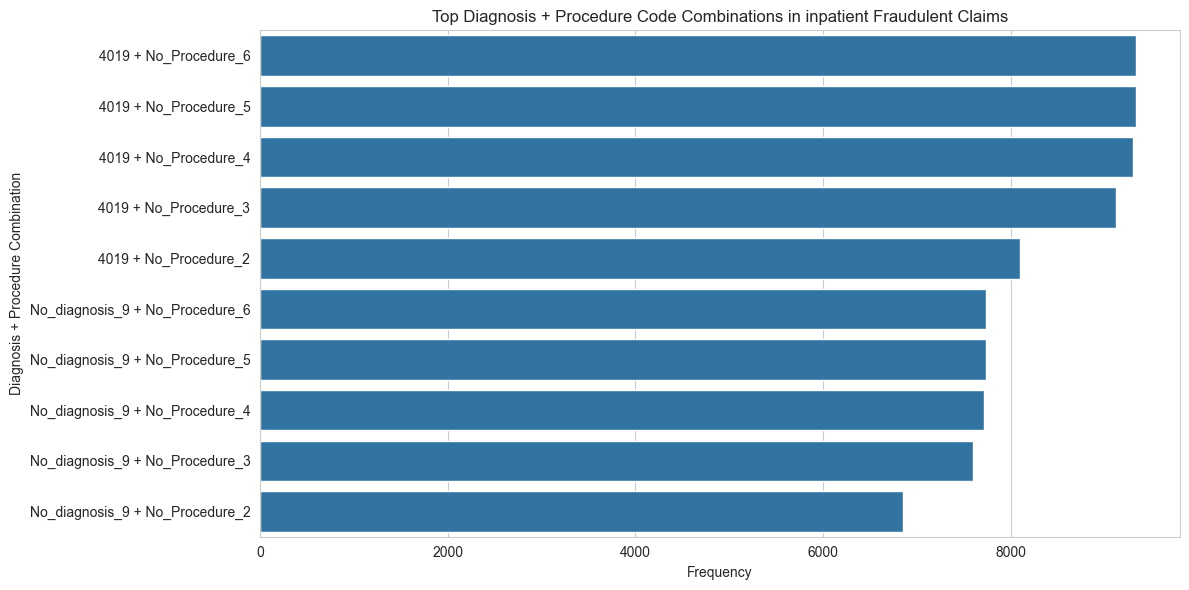

In [176]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_diag_proc_combos,
    x='Frequency',
    y=top_diag_proc_combos['Diagnosis_Code'] + ' + ' + top_diag_proc_combos['Procedure_Code']
)
plt.title('Top Diagnosis + Procedure Code Combinations in inpatient Fraudulent Claims')
plt.xlabel('Frequency')
plt.ylabel('Diagnosis + Procedure Combination')
plt.tight_layout()
plt.show()

#### Insights on top diagnosis and procedure combos in inpatient fraud claims

- **Observation:**
  The top five most frequent combinations all involve the diagnosis code 4019 (commonly associated with essential hypertension) paired with No_Procedure_X codes. 4019 + No_Procedure_6 has the highest frequency, slightly higher than others. Every procedure code in the top combinations is a No_Procedure_X placeholder, reinforcing a pattern of procedure omission. 

- **Interpretation:**
  Fraudsters may use a legitimate diagnosis (4019) while pairing it with dummy procedure codes to avoid detection or due to lack of actual performed services. The recurring use of No_Procedure codes indicates that inpatient fraudulent claims often lack proper procedure documentation, a critical red flag. The combination of a serious condition like hypertension without any valid inpatient procedure suggests medically unlikely or suspicious billing behavior. These combinations can be powerful features in a fraud detection model. Claims with 4019 and a No_Procedure code could be scored higher for audit or review.

### Top diagnosis and procedure combos in outpatient fraudulent claims

In [177]:
from itertools import product

# Convert diagnosis and procedure codes into lists per row
fraud_outpatient_claims['Diagnosis_List'] = fraud_outpatient_claims[diagnosis_cols].values.tolist()
fraud_outpatient_claims['Procedure_List'] = fraud_outpatient_claims[procedure_cols].values.tolist()

fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration,Diagnosis_List,Procedure_List
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0,"[78943, V5866, V1272, No_diagnosis_4, No_diagn...","[No_Procedure_1, No_Procedure_2, No_Procedure_..."
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,"[71988, No_diagnosis_2, No_diagnosis_3, No_dia...","[No_Procedure_1, No_Procedure_2, No_Procedure_..."
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0,"[82382, 30000, 72887, 4280, 7197, V4577, No_di...","[No_Procedure_1, No_Procedure_2, No_Procedure_..."
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,No Operating Physician,No Other Physician,20381,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,"[20381, No_diagnosis_2, No_diagnosis_3, No_dia...","[No_Procedure_1, No_Procedure_2, No_Procedure_..."
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,No Operating Physician,No Other Physician,V6546,4280,2449,V854,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,2449,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,"[V6546, 4280, 2449, V854, No_diagnosis_5, No_d...","[No_Procedure_1, No_Procedure_2, No_Procedure_..."


In [178]:
# Create all combinations of diagnosis + procedure per claim
diag_proc_combos = []

for _, row in fraud_outpatient_claims.iterrows():
    diagnoses = [d for d in row['Diagnosis_List']]
    procedures = [p for p in row['Procedure_List']]
    diag_proc_combos += list(product(diagnoses, procedures))

In [179]:
# Create DataFrame of combinations and count
diag_proc_df = pd.DataFrame(diag_proc_combos, columns=['Diagnosis_Code', 'Procedure_Code'])

top_diag_proc_combos_op = (
    diag_proc_df
    .value_counts()
    .reset_index(name='Frequency')
    .head(10)
)

top_diag_proc_combos_op.head()

,Diagnosis_Code,Procedure_Code,Frequency
0,No_diagnosis_3,No_Procedure_4,230378
1,No_diagnosis_3,No_Procedure_3,230378
2,No_diagnosis_3,No_Procedure_6,230378
3,No_diagnosis_3,No_Procedure_5,230378
4,No_diagnosis_3,No_Procedure_2,230374


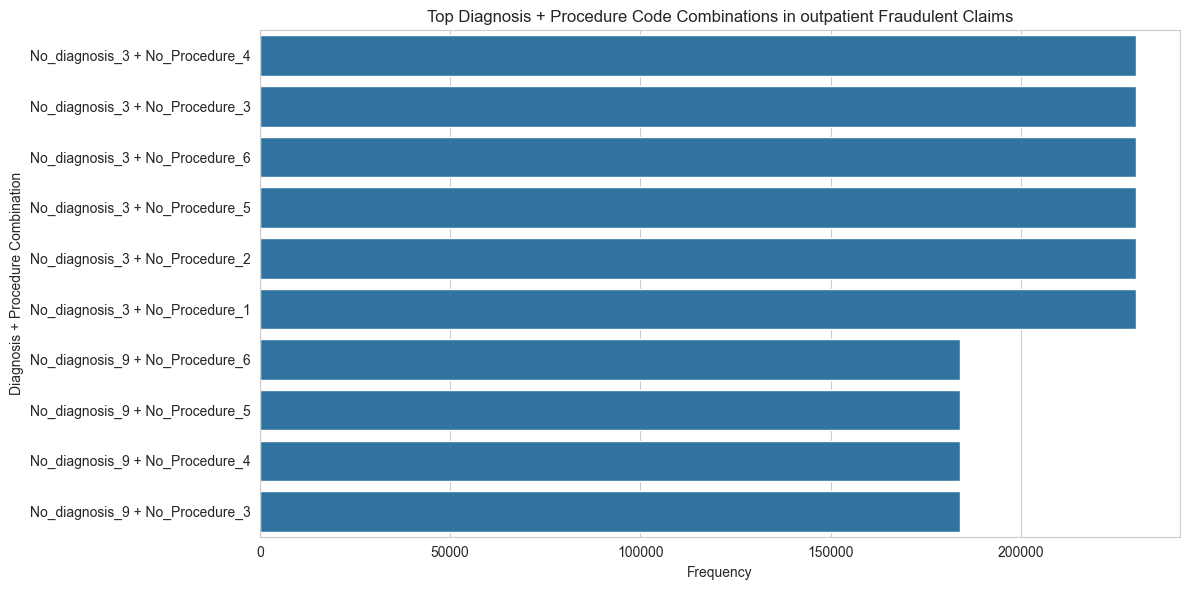

In [182]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_diag_proc_combos_op,
    x='Frequency',
    y=top_diag_proc_combos_op['Diagnosis_Code'] + ' + ' + top_diag_proc_combos_op['Procedure_Code']
)
plt.title('Top Diagnosis + Procedure Code Combinations in outpatient Fraudulent Claims')
plt.xlabel('Frequency')
plt.ylabel('Diagnosis + Procedure Combination')
plt.tight_layout()
plt.show()

#### Insights on top diagnosis and procedure combos in outpatient fraud claims

- **Observation:**
  The top 6 most frequent fraudulent combinations all involve the diagnosis code No_diagnosis_3. These are paired with procedure codes from No_Procedure_1 to No_Procedure_6. Each combination with No_diagnosis_3 has very high frequency (close to 200,000), indicating heavy usage of these code pairs in outpatient fraudulent claims. The next 4 most frequent combinations involve No_diagnosis_9 with the same set of No_Procedure codes. These are slightly less frequent but still significantly high (~180,000 range). All top combinations use placeholder or missing diagnosis and procedure codes (i.e., No_diagnosis_X and No_Procedure_X), rather than valid ICD or CPT codes.

- **Interpretation:**
  Widespread Use of Placeholder Codes. This suggests a potential fraudulent strategy in outpatient claims: using dummy diagnosis and procedure codes to avoid scrutiny or due to absence of real medical justification. A small number of code combinations account for a large volume of fraudulent claims, indicating systematic or automated fraud patterns. Unlike inpatient settings (which may blend real and fake data), outpatient fraudulent claims heavily rely on fabricated or missing medical codes, making them easier to detect but also more common. Flagging claims with No_diagnosis_3 or No_diagnosis_9 in combination with No_Procedure codes can serve as a strong signal in fraud detection models or auditing processes.

### Beneficiary demographic profiling in inpatient fraudulent claims

In [183]:
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,56400,7092.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,2,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,71690,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,7843,331.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,8,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,34400,3893.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,17,17


In [184]:
inp_provider_claims = pd.merge(inp_provider_claims, beneficiary, on = "BeneID", how = "left")
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,56400,7092.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,2,2,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,71690,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,3,3,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,7843,331.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,8,8,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,34400,3893.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,17,17,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


In [185]:
fraud_inpatient_claims = inp_provider_claims[inp_provider_claims['PotentialFraud'] == "Yes"]
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,78702,863.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1940-06-01,NaN,2,1,0,31,270,12,12,1,1,1,1,1,2,1,1,2,1,1,22000,2136,1400,840
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,No Other Physician,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,30000,9904.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,4,4,1941-12-01,NaN,1,1,0,38,230,12,12,2,2,2,2,2,2,1,1,1,2,2,6000,1068,0,0
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,No Other Physician,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,V851,3612.0,4139.0,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,7,7,1946-03-01,NaN,2,1,0,34,760,12,12,1,1,1,2,1,1,1,1,2,1,1,131140,2136,1650,80
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,No Other Physician,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,78552,9672.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,8,8,1946-03-01,NaN,2,1,0,34,760,12,12,1,1,1,2,1,1,1,1,2,1,1,131140,2136,1650,80


In [186]:
# Count fraud claims by demographic features
demo_cols = ['Gender', 'Race', 'RenalDiseaseIndicator']

for col in demo_cols:
    print(fraud_inpatient_claims[col].value_counts(dropna=False))

Gender
2    13360
1    10042
Name: count, dtype: int64
Race
1    19736
2     2430
3      770
5      466
Name: count, dtype: int64
RenalDiseaseIndicator
0    17291
Y     6111
Name: count, dtype: int64


In [187]:
# Clean Gender 2 to 0
inp_provider_claims['Gender'] = [0 if val == 2 else 1 for val in inp_provider_claims['Gender']]

# Clean Renaldisease indicator 'Y' to 1
inp_provider_claims['RenalDiseaseIndicator'] = [1 if val == 'Y' else 0 for val in inp_provider_claims['RenalDiseaseIndicator']]

In [188]:
inp_provider_claims['Gender'].value_counts()

Gender
0    23267
1    17207
Name: count, dtype: int64

In [189]:
inp_provider_claims['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    29941
1    10533
Name: count, dtype: int64

In [190]:
fraud_inpatient_claims = inp_provider_claims[inp_provider_claims['PotentialFraud'] == "Yes"]
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,78702,863.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1940-06-01,NaN,0,1,0,31,270,12,12,1,1,1,1,1,2,1,1,2,1,1,22000,2136,1400,840
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,No Other Physician,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,30000,9904.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,4,4,1941-12-01,NaN,1,1,0,38,230,12,12,2,2,2,2,2,2,1,1,1,2,2,6000,1068,0,0
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,No Other Physician,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,V851,3612.0,4139.0,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,7,7,1946-03-01,NaN,0,1,0,34,760,12,12,1,1,1,2,1,1,1,1,2,1,1,131140,2136,1650,80
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,No Other Physician,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,78552,9672.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,8,8,1946-03-01,NaN,0,1,0,34,760,12,12,1,1,1,2,1,1,1,1,2,1,1,131140,2136,1650,80


In [191]:
# Count fraud claims by demographic features after data cleaned
demo_cols = ['Gender', 'Race', 'RenalDiseaseIndicator']

for col in demo_cols:
    print(fraud_inpatient_claims[col].value_counts(dropna=False))

Gender
0    13360
1    10042
Name: count, dtype: int64
Race
1    19736
2     2430
3      770
5      466
Name: count, dtype: int64
RenalDiseaseIndicator
0    17291
1     6111
Name: count, dtype: int64


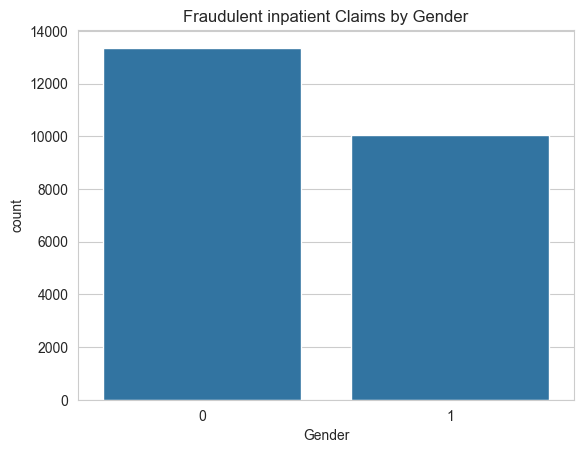

In [193]:
# Gender distribution of Fraud Claims in inpatient
sns.countplot(data=fraud_inpatient_claims, x='Gender')
plt.title('Fraudulent inpatient Claims by Gender')
plt.show()

#### Insights on Gender distribution of fraud claims in inaptient

- **Observation:**
  Gender 0 has a higher count of fraudulent inpatient claims (~13,500) compared to Gender 1 (~10,000). There's a difference of approximately 3,500 claims between the two gender categories, which is a significant margin.

- **Interpretation:**
  Assume 0 as Female and 1 as Male. Female patients have more fraudulent inpatient claims than male patients. Gender-based differences in healthcare utilization (e.g., women may have more inpatient procedures). Targeted fraud patterns exploiting certain gender-specific services. Gender can be used as a feature in predictive models, though with caution to avoid bias. Further analysis may be warranted to examine specific services or diagnoses contributing to this discrepancy.

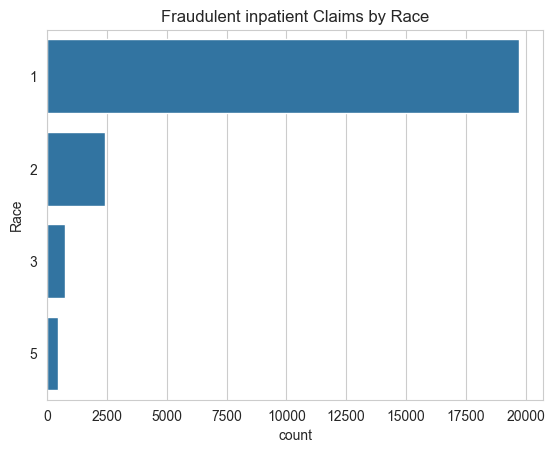

In [195]:
# Race distribution of Fraud Claims in inpatient
sns.countplot(data=fraud_inpatient_claims, y ='Race')
plt.title('Fraudulent inpatient Claims by Race')
plt.show()

#### Insights on Race distribution of fraud claims in inaptient

- **Observation:**
  The majority of fraudulent inpatient claims are from beneficiaries with Race code 1, nearing 20,000 claims. This is drastically higher compared to other race codes. Race code 2 has a significantly lower count, roughly 2,500 claims. Race codes 3 and 5 show very few fraudulent claims, well under 1,000. 

- **Interpretation:**
  Race_1 beneficiaries are significantly overrepresented in fraudulent inpatient claims. Could reflect actual fraud patterns, or it might mirror population demographics or claim volume for that race group.

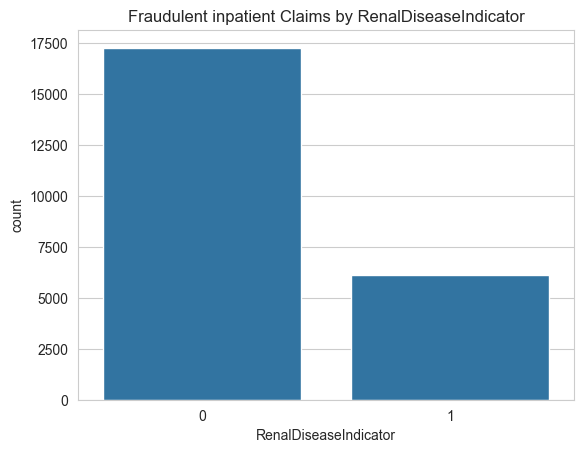

In [196]:
# Race distribution of Fraud Claims in inpatient
sns.countplot(data=fraud_inpatient_claims, x ='RenalDiseaseIndicator')
plt.title('Fraudulent inpatient Claims by RenalDiseaseIndicator')
plt.show()

#### Insights on RenalDiseaseIndicator distribution of fraud claims in inaptient

- **Observation:**
  The number of fraudulent inpatient claims is significantly higher among beneficiaries without renal disease (RenalDiseaseIndicator = 0) compared to those with renal disease (RenalDiseaseIndicator = 1). Specifically, claims without renal disease are nearly three times as many.

- **Interpretation:**
  Fraudulent inpatient claims are more prevalent in patients not diagnosed with renal disease. This may suggest that fraudsters might be targeting more common or less scrutinized cases, as renal disease might prompt more thorough review or documentation.

In [198]:
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,56400,7092.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,2,2,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,71690,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,3,3,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,7843,331.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,8,8,1914-03-01,NaN,0,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,34400,3893.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,17,17,1938-04-01,NaN,0,1,1,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


In [199]:
# Select chronic condition columns
chronic_cols = [col for col in inp_provider_claims.columns if col.startswith('ChronicCond_')]
chronic_cols

['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

In [200]:
# Clean chronic condition columns 2 to 0
for col in chronic_cols:
    inp_provider_claims[col] = [0 if val == 2 else 1 for val in inp_provider_claims[col]]
    
inp_provider_claims[chronic_cols].head()

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,1,0,1,0,0,1,1,1,0,1,1
1,1,0,1,0,0,1,1,1,0,1,1
2,1,0,1,0,0,1,1,1,0,1,1
3,0,1,1,0,0,1,1,0,0,1,1
4,0,1,1,0,1,1,0,1,0,0,0


In [201]:
fraud_inpatient_claims = inp_provider_claims[inp_provider_claims['PotentialFraud'] == "Yes"]
fraud_inpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,78702,863.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1940-06-01,NaN,0,1,0,31,270,12,12,1,1,1,1,1,0,1,1,0,1,1,22000,2136,1400,840
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,No Other Physician,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,30000,9904.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,4,4,1941-12-01,NaN,1,1,0,38,230,12,12,0,0,0,0,0,0,1,1,1,0,0,6000,1068,0,0
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,No Other Physician,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,V851,3612.0,4139.0,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,7,7,1946-03-01,NaN,0,1,0,34,760,12,12,1,1,1,0,1,1,1,1,0,1,1,131140,2136,1650,80
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,No Other Physician,2009-07-01,78605,1068.0,2009-07-09,857,03842,25541,78552,2762,5849,5990,5601,591,51881,78552,9672.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,8,8,1946-03-01,NaN,0,1,0,34,760,12,12,1,1,1,0,1,1,1,1,0,1,1,131140,2136,1650,80


In [202]:
# Sum chronic conditions
chronic_counts = fraud_inpatient_claims[chronic_cols].sum().sort_values(ascending=False)
chronic_counts

ChronicCond_IschemicHeart          20075
ChronicCond_Diabetes               18762
ChronicCond_Heartfailure           16970
ChronicCond_KidneyDisease          14103
ChronicCond_Depression             11763
ChronicCond_Alzheimer              11756
ChronicCond_ObstrPulmonary         11251
ChronicCond_rheumatoidarthritis     8493
ChronicCond_Osteoporasis            8269
ChronicCond_Cancer                  4488
ChronicCond_stroke                  4006
dtype: int64

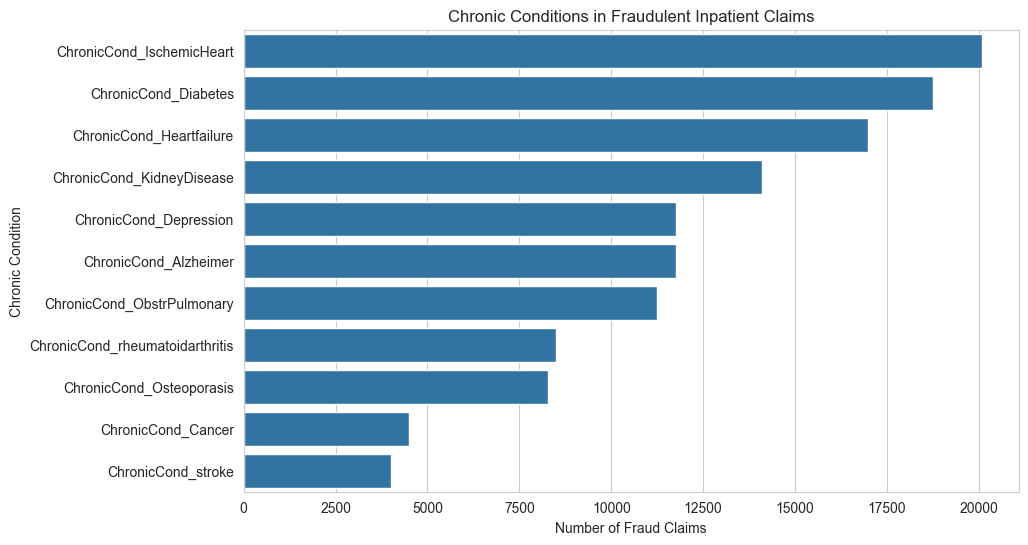

In [203]:
# Plot chronic conditions count
plt.figure(figsize=(10, 6))
sns.barplot(x=chronic_counts.values, y=chronic_counts.index)
plt.title('Chronic Conditions in Fraudulent Inpatient Claims')
plt.xlabel('Number of Fraud Claims')
plt.ylabel('Chronic Condition')
plt.show()

#### Insights on chronic conditions in inpatient fraudulent claims

- **Observation:**
  Among all chronic conditions, Ischemic Heart Disease, Diabetes, and Heart Failure are associated with the highest number of fraudulent inpatient claims, each exceeding 15,000 to 19,000 cases. On the other end, Stroke and Cancer have the fewest fraudulent claims, with less than 5,000 cases each.

- **Interpretation:**
  Fraudulent claims appear to be more frequently linked to common and high-cost chronic conditions such as Ischemic Heart Disease and Diabetes. These conditions likely involve repeated and expensive treatments, which may present more opportunities for fraudulent billing. Conversely, less common or more acute conditions like stroke and cancer may undergo stricter scrutiny or involve less frequent claims, making them less attractive for fraud.

In [205]:
# Analyze chronic condition combos
def get_condition_combo(row):
    active_conditions = [cond.replace('ChronicCond_', '') for cond in chronic_cols if row[cond] == 1]
    if active_conditions:
        return '_'.join(sorted(active_conditions))
    else:
        return 'No_Chronic_Condition'

# Apply to each row
fraud_inpatient_claims['Chronic_Combo'] = fraud_inpatient_claims.apply(get_condition_combo, axis=1)
fraud_inpatient_claims['Chronic_Combo'].head()

0     Alzheimer_Depression_Diabetes_IschemicHeart_Ki...
5     Alzheimer_Cancer_Diabetes_Heartfailure_Ischemi...
7                   Diabetes_IschemicHeart_Osteoporasis
9     Alzheimer_Depression_Diabetes_Heartfailure_Isc...
10    Alzheimer_Depression_Diabetes_Heartfailure_Isc...
Name: Chronic_Combo, dtype: object

In [206]:
chronic_combo_counts = fraud_inpatient_claims['Chronic_Combo'].value_counts().reset_index()
chronic_combo_counts.columns = ['Chronic_Condition_Combo', 'Fraud_Claim_Count']
chronic_combo_counts.head()

,Chronic_Condition_Combo,Fraud_Claim_Count
0,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,410
1,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,367
2,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,355
3,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,304
4,Alzheimer_Diabetes_Heartfailure_IschemicHeart_...,293


In [207]:
top_chronic_combos_ip = chronic_combo_counts.head(10)
top_chronic_combos_ip.head()

,Chronic_Condition_Combo,Fraud_Claim_Count
0,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,410
1,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,367
2,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,355
3,Alzheimer_Depression_Diabetes_Heartfailure_Isc...,304
4,Alzheimer_Diabetes_Heartfailure_IschemicHeart_...,293


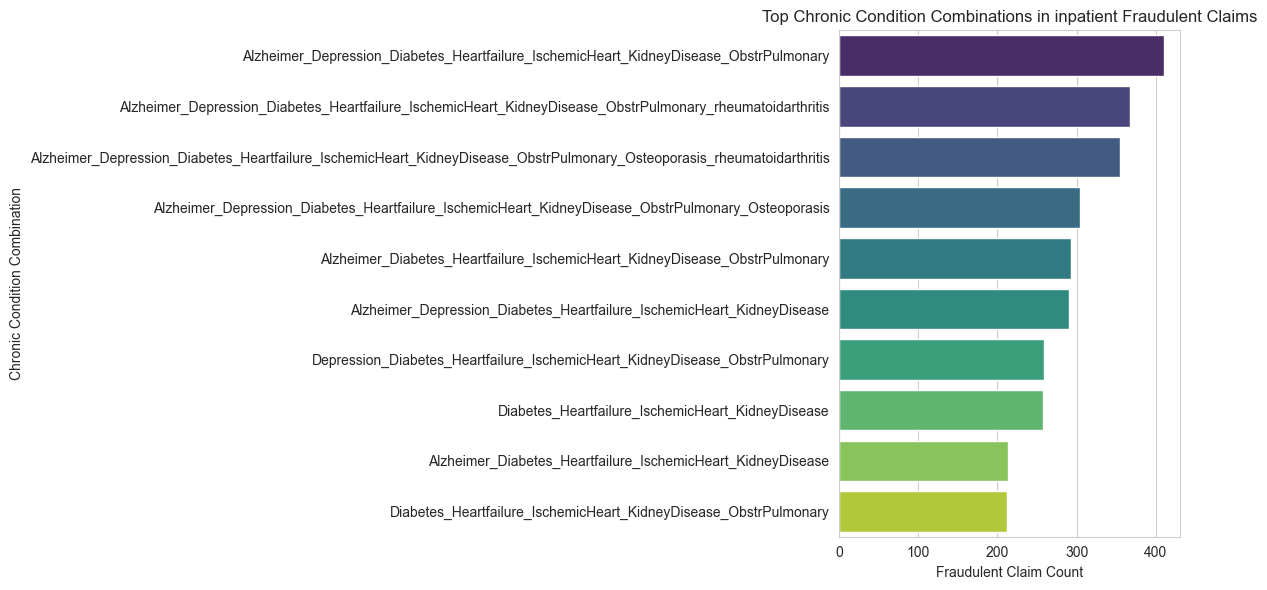

In [208]:
# Visualize top chronic condition combos
plt.figure(figsize=(12, 6))
sns.barplot(data=top_chronic_combos_ip, x='Fraud_Claim_Count', y='Chronic_Condition_Combo', palette='viridis')
plt.title('Top Chronic Condition Combinations in inpatient Fraudulent Claims')
plt.xlabel('Fraudulent Claim Count')
plt.ylabel('Chronic Condition Combination')
plt.tight_layout()
plt.show()

#### Insights on chronic conditions combinations in inpatient fraudulent claims

- **Observation:**
  The most frequent combinations in fraudulent inpatient claims involve a high number of co-occurring chronic conditions. The top combination—Alzheimer, Depression, Diabetes, Heart Failure, Ischemic Heart, Kidney Disease, Obstructive Pulmonary, and Rheumatoid Arthritis—accounts for the highest fraudulent claim count, followed closely by other combinations with 6–7 chronic conditions.

- **Interpretation:**
  Fraudulent claims are most common among patients with multiple complex chronic conditions, likely because such profiles justify more extensive medical services, making them attractive targets for overbilling or fabricated treatments. This suggests that fraudsters may exploit multi-morbidity cases to increase claim amounts without immediately triggering suspicion.

In [209]:
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,56400,7092.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,2,2,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,71690,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,3,3,1943-01-01,NaN,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,7843,331.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,8,8,1914-03-01,NaN,0,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,34400,3893.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,17,17,1938-04-01,NaN,0,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100


In [210]:
# Convert DOB and DOD to datetime if not already
inp_provider_claims['DOB'] = pd.to_datetime(inp_provider_claims['DOB'])
inp_provider_claims['DOD'] = pd.to_datetime(inp_provider_claims['DOD'])

In [214]:
inp_provider_claims['DOB'].dtype

dtype('<M8[ns]')

In [215]:
inp_provider_claims['DOD'].dtype

dtype('<M8[ns]')

In [216]:
# Calculate age at current date or use DOD if available
today = pd.to_datetime('today')

inp_provider_claims['Age'] = inp_provider_claims.apply(
    lambda row: ((row['DOD']) if pd.notnull(row['DOD']) else today).year - row['DOB'].year,
    axis=1
)
inp_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ClaimDuration,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,No Operating Physician,No Other Physician,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,5853,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,Yes,6,6,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,82
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,No Other Physician,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,56400,7092.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,2,2,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,82
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No Operating Physician,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,71690,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,3,3,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,82
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,7843,331.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,8,8,1914-03-01,NaT,0,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,111
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,No Other Physician,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,34400,3893.0,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,No,17,17,1938-04-01,NaT,0,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,87


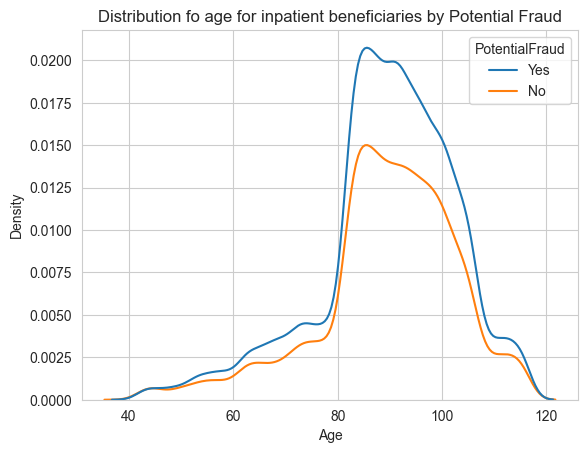

In [219]:
# Distribution of Age for inpatient beneficiaries by Potential fraud
sns.kdeplot(data = inp_provider_claims, x = 'Age', hue = "PotentialFraud")
plt.title("Distribution fo age for inpatient beneficiaries by Potential Fraud")
plt.show()

#### Insights on Distribution of age for inpatient beneficiaries by Potential Fraud

- **Observation:**
  Fraudulent inpatient claims are more concentrated in the older age group (80–100 years) compared to non-fraudulent claims. The peak density for fraudulent cases is higher than that for non-fraudulent cases within this range. There is also a broader age distribution for fraud cases, extending beyond age 100.

- **Interpretation:**
  Elderly beneficiaries, particularly those aged 80 and above, are more likely to be involved in fraudulent claims. This may be due to the increased likelihood of complex health needs and frequent medical interventions in this age group, making them more susceptible to fraudulent billing or overutilization schemes. The wider age range suggests fraud isn’t restricted to a narrow age band but skews older overall.

### Beneficiary demographic profiling in outpatient fraudulent claims

In [226]:
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,No Operating Physician,No Other Physician,6115,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,79380,No,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,No Operating Physician,No Other Physician,2723,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,No,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0


In [227]:
op_provider_claims = pd.merge(op_provider_claims, beneficiary, on = "BeneID", how = "left")
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,No Operating Physician,No Other Physician,6115,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,79380,No,0,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,No Operating Physician,No Other Physician,2723,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,No,0,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760


In [228]:
fraud_outpatient_claims = op_provider_claims[op_provider_claims['PotentialFraud'] == "Yes"]
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,No Operating Physician,No Other Physician,20381,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,No Operating Physician,No Other Physician,V6546,4280,2449,V854,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,2449,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760


In [229]:
# Count fraud claims by demographic features
demo_cols = ['Gender', 'Race', 'RenalDiseaseIndicator']

for col in demo_cols:
    print(fraud_outpatient_claims[col].value_counts(dropna=False))

Gender
2    109753
1     79641
Name: count, dtype: int64
Race
1    158609
2     17854
3      8192
5      4739
Name: count, dtype: int64
RenalDiseaseIndicator
0    152815
Y     36579
Name: count, dtype: int64


In [230]:
# Clean Gender 2 to 0
op_provider_claims['Gender'] = [0 if val == 2 else 1 for val in op_provider_claims['Gender']]

# Clean Renaldisease indicator 'Y' to 1
op_provider_claims['RenalDiseaseIndicator'] = [1 if val == 'Y' else 0 for val in op_provider_claims['RenalDiseaseIndicator']]

In [231]:
op_provider_claims['Gender'].value_counts()

Gender
0    299847
1    217890
Name: count, dtype: int64

In [232]:
op_provider_claims['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    418422
1     99315
Name: count, dtype: int64

In [233]:
fraud_outpatient_claims = op_provider_claims[op_provider_claims['PotentialFraud'] == "Yes"]
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0,1936-09-01,NaN,0,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,No Operating Physician,No Other Physician,20381,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,No Operating Physician,No Other Physician,V6546,4280,2449,V854,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,2449,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760


In [234]:
# Count fraud claims by demographic features after data cleaned
demo_cols = ['Gender', 'Race', 'RenalDiseaseIndicator']

for col in demo_cols:
    print(fraud_outpatient_claims[col].value_counts(dropna=False))

Gender
0    109753
1     79641
Name: count, dtype: int64
Race
1    158609
2     17854
3      8192
5      4739
Name: count, dtype: int64
RenalDiseaseIndicator
0    152815
1     36579
Name: count, dtype: int64


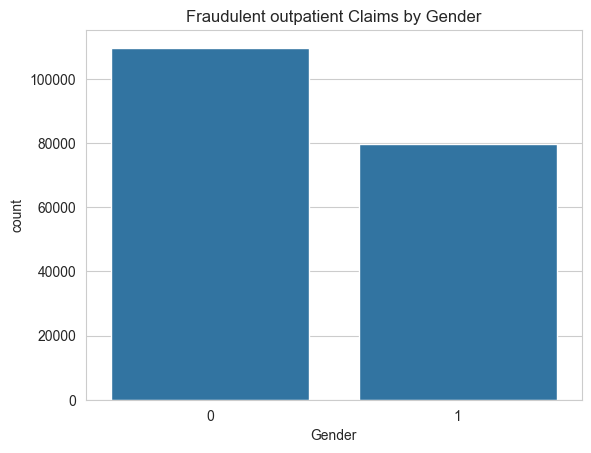

In [235]:
# Gender distribution of Fraud Claims in inpatient
sns.countplot(data=fraud_outpatient_claims, x='Gender')
plt.title('Fraudulent outpatient Claims by Gender')
plt.show()

#### Insights on Gender distribution of fraud claims in outpatient

- **Observation:**
  Outpatient fraudulent claims are higher among beneficiaries labeled as gender 0 compared to those labeled as 1. The number of fraudulent claims for gender 0 exceeds 100,000, while for gender 1, it is around 80,000.

- **Interpretation:**
  Gender 0 beneficiaries (typically interpreted as females) are associated with a significantly higher volume of outpatient fraudulent claims than gender 1 beneficiaries (typically males). This discrepancy might suggest a pattern in healthcare usage or provider targeting strategies that disproportionately affect female beneficiaries.

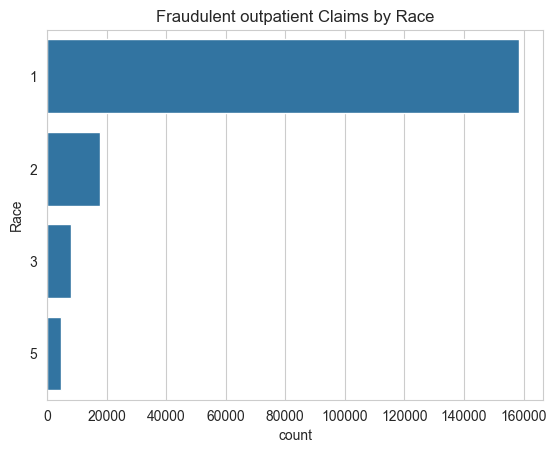

In [236]:
# Race distribution of Fraud Claims in inpatient
sns.countplot(data=fraud_outpatient_claims, y ='Race')
plt.title('Fraudulent outpatient Claims by Race')
plt.show()

#### Insights on Race distribution of fraud claims in outpatient

- **Observation:**
  The majority of fraudulent outpatient claims are associated with beneficiaries of race code 1, with counts exceeding 150,000. Other race codes (2, 3, and 5) have significantly lower claim counts, with race 2 being the next highest but still far behind.

- **Interpretation:**
  Beneficiaries identified as race code 1 (which often represents White in healthcare datasets) are disproportionately represented in outpatient fraudulent claims. This could be due to demographic prevalence, differing access to healthcare providers, or potential targeting practices by fraudulent entities.

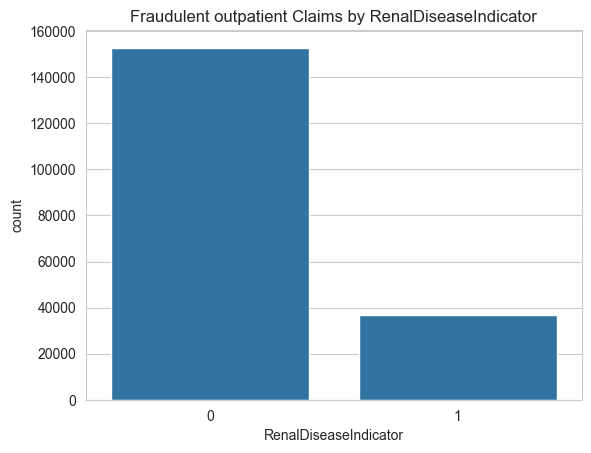

In [237]:
# Race distribution of Fraud Claims in inpatient
sns.countplot(data=fraud_outpatient_claims, x ='RenalDiseaseIndicator')
plt.title('Fraudulent outpatient Claims by RenalDiseaseIndicator')
plt.show()

#### Insights on RenalDiseaseIndicator distribution of fraud claims in outpatient

- **Observation:**
  The count of fraudulent outpatient claims is significantly higher for individuals without renal disease (RenalDiseaseIndicator = 0). There is a noticeably lower number of fraudulent claims among individuals with renal disease (RenalDiseaseIndicator = 1).

- **Interpretation:**
  Fraudulent claims are more prevalent among patients who do not have renal disease. This could indicate that fraudulent behavior is more likely to occur in populations without chronic conditions like renal disease, potentially because such patients may be subject to less scrutiny Patients with renal disease might be under more frequent medical observation or regulation, making it harder to commit or process fraudulent claims. Alternatively, this could also imply that fraudsters might be targeting healthier populations (or ones without severe chronic conditions) to avoid drawing attention.

In [239]:
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0,1936-09-01,NaN,0,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,No Operating Physician,No Other Physician,6115,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,79380,No,0,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,No Operating Physician,No Other Physician,2723,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,No,0,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760


In [240]:
# Select chronic condition columns
chronic_cols = [col for col in op_provider_claims.columns if col.startswith('ChronicCond_')]
chronic_cols

['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

In [241]:
# Clean chronic condition columns 2 to 0
for col in chronic_cols:
    op_provider_claims[col] = [0 if val == 2 else 1 for val in op_provider_claims[col]]
    
op_provider_claims[chronic_cols].head()

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,1,1,1,1,0
4,1,1,0,0,0,0,1,1,1,1,0


In [242]:
fraud_outpatient_claims = op_provider_claims[op_provider_claims['PotentialFraud'] == "Yes"]
fraud_outpatient_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0,1936-09-01,NaN,0,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,No Operating Physician,No Other Physician,20381,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,No Operating Physician,No Other Physician,V6546,4280,2449,V854,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,2449,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760


In [243]:
# Sum chronic conditions
chronic_counts = fraud_outpatient_claims[chronic_cols].sum().sort_values(ascending=False)
chronic_counts

ChronicCond_IschemicHeart          142437
ChronicCond_Diabetes               132003
ChronicCond_Heartfailure           109876
ChronicCond_Depression              80825
ChronicCond_KidneyDisease           75744
ChronicCond_Alzheimer               74591
ChronicCond_Osteoporasis            59474
ChronicCond_rheumatoidarthritis     58350
ChronicCond_ObstrPulmonary          56857
ChronicCond_Cancer                  28090
ChronicCond_stroke                  18390
dtype: int64

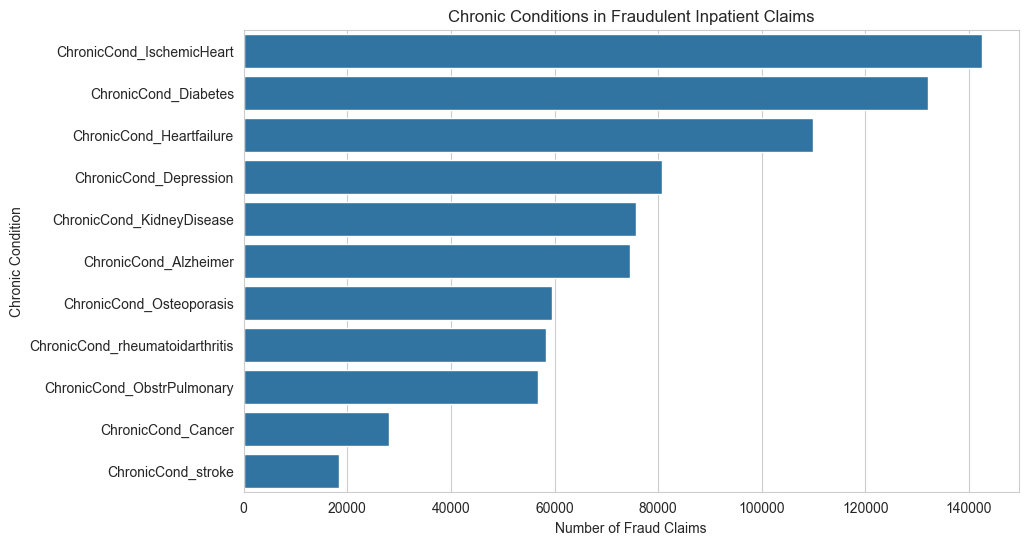

In [244]:
# Plot chronic conditions count
plt.figure(figsize=(10, 6))
sns.barplot(x=chronic_counts.values, y=chronic_counts.index)
plt.title('Chronic Conditions in Fraudulent Inpatient Claims')
plt.xlabel('Number of Fraud Claims')
plt.ylabel('Chronic Condition')
plt.show()

#### Insights on chronic conditions in outpatient fraudulent claims

- **Observation:**
  The top three chronic conditions most associated with fraudulent inpatient claims are Ischemic Heart Disease, Diabetes, Heart Failure. These conditions each have more than 100,000 fraudulent claims. Stroke and Cancer are the least represented among fraudulent claims, with less than 30,000 each.

- **Interpretation:**
  Fraudulent inpatient claims are more likely to involve common and high-cost chronic conditions like Ischemic Heart Disease, Diabetes, and Heart Failure. This may be due to Frequent hospitalizations and procedures associated with these illnesses, creating more billing opportunities and the possibility that fraudsters may exploit the prevalence and complexity of these conditions to disguise fraudulent activity. Conditions like stroke and cancer might have less variability in treatment paths, or perhaps more rigorous documentation and monitoring, making fraudulent claims harder to fabricate or justify. Mental health and degenerative disorders like Depression and Alzheimer’s also show notable fraud claim counts, which could reflect vulnerabilities in behavioral health oversight or elderly care systems.

In [245]:
# Analyze chronic condition combos
fraud_outpatient_claims['Chronic_Combo'] = fraud_outpatient_claims.apply(get_condition_combo, axis=1)
fraud_outpatient_claims['Chronic_Combo'].head()

0                                 No_Chronic_Condition
3    Alzheimer_Diabetes_Heartfailure_IschemicHeart_...
4    Alzheimer_Diabetes_Heartfailure_IschemicHeart_...
5    Alzheimer_Diabetes_Heartfailure_IschemicHeart_...
6    Alzheimer_Diabetes_Heartfailure_IschemicHeart_...
Name: Chronic_Combo, dtype: object

In [248]:
chronic_combo_counts = fraud_outpatient_claims['Chronic_Combo'].value_counts().reset_index()
chronic_combo_counts.columns = ['Chronic_Condition_Combo', 'Fraud_Claim_Count']
chronic_combo_counts.head()

,Chronic_Condition_Combo,Fraud_Claim_Count
0,No_Chronic_Condition,7844
1,IschemicHeart,4647
2,Diabetes_IschemicHeart,3514
3,Diabetes_Heartfailure_IschemicHeart,2907
4,Diabetes,2539


In [249]:
top_chronic_combos_op = chronic_combo_counts.head(10)
top_chronic_combos_op.head()

,Chronic_Condition_Combo,Fraud_Claim_Count
0,No_Chronic_Condition,7844
1,IschemicHeart,4647
2,Diabetes_IschemicHeart,3514
3,Diabetes_Heartfailure_IschemicHeart,2907
4,Diabetes,2539


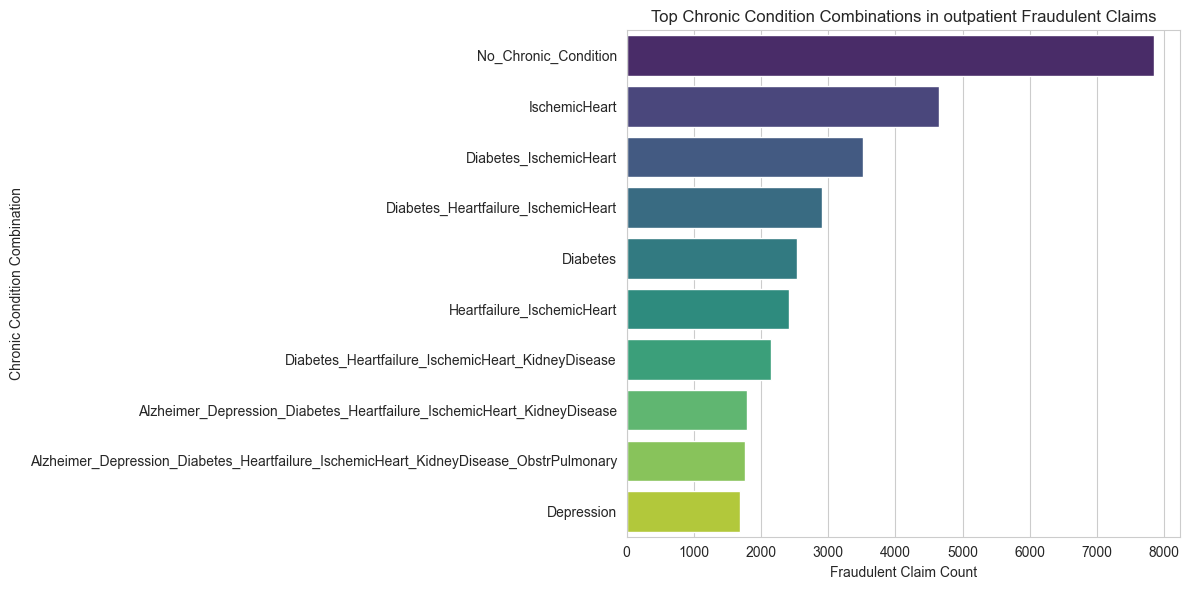

In [250]:
# Visualize top chronic condition combos
plt.figure(figsize=(12, 6))
sns.barplot(data=top_chronic_combos_op, x='Fraud_Claim_Count', y='Chronic_Condition_Combo', palette='viridis')
plt.title('Top Chronic Condition Combinations in outpatient Fraudulent Claims')
plt.xlabel('Fraudulent Claim Count')
plt.ylabel('Chronic Condition Combination')
plt.tight_layout()
plt.show()

#### Insights on chronic conditions combinations in outpatient fraudulent claims

- **Observation:**
  The highest number of outpatient fraudulent claims are associated with beneficiaries having no chronic conditions. The most frequent chronic condition combination in fraudulent claims is Ischemic Heart, followed by Diabetes + Ischemic Heart. As the number of chronic conditions in a combination increases (e.g., 4 or more), the count of fraudulent claims decreases, though still notable. Individual conditions like Depression also appear among top fraud combinations, despite not being paired with others.

- **Interpretation:**
  A significant number of outpatient fraud cases occur among individuals with no reported chronic conditions, which may suggest Fraudsters fabricate services for generally healthy individuals who require less medical oversight and “Clean” health records may be easier to manipulate or less scrutinized by insurers. Ischemic Heart and Diabetes are consistently present in top fraudulent combinations, reinforcing that these conditions are often used in false claims—likely due to their commonality and billable procedures. Claims involving multiple chronic conditions, although fewer in number, may indicate complex fraud where layered diagnoses are used to justify higher reimbursements. The appearance of Depression as a standalone condition among top fraudulent combinations may highlight mental health services as a vulnerable area for outpatient fraud.

In [252]:
# Convert DOB and DOD to datetime if not already
op_provider_claims['DOB'] = pd.to_datetime(op_provider_claims['DOB'])
op_provider_claims['DOD'] = pd.to_datetime(op_provider_claims['DOD'])

In [253]:
op_provider_claims['DOB'].dtype

dtype('<M8[ns]')

In [254]:
op_provider_claims['DOD'].dtype

dtype('<M8[ns]')

In [255]:
# Calculate age at current date or use DOD if available
today = pd.to_datetime('today')

op_provider_claims['Age'] = op_provider_claims.apply(
    lambda row: ((row['DOD']) if pd.notnull(row['DOD']) else today).year - row['DOB'].year,
    axis=1
)
op_provider_claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,No Operating Physician,No Other Physician,78943,V5866,V1272,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,V1272,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,56409,Yes,0,1936-09-01,NaT,0,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,89
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,No Operating Physician,No Other Physician,6115,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,79380,No,0,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,89
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,No Operating Physician,No Other Physician,2723,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,No,0,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,89
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,No Operating Physician,No Other Physician,71988,No_diagnosis_2,No_diagnosis_3,No_diagnosis_4,No_diagnosis_5,No_diagnosis_6,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,No_diagnosis_3,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,NaN,Yes,0,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,103
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,No Operating Physician,No Other Physician,82382,30000,72887,4280,7197,V4577,No_diagnosis_7,No_diagnosis_8,No_diagnosis_9,72887,No_Procedure_1,No_Procedure_2,No_Procedure_3,No_Procedure_4,No_Procedure_5,No_Procedure_6,0,71947,Yes,0,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,103


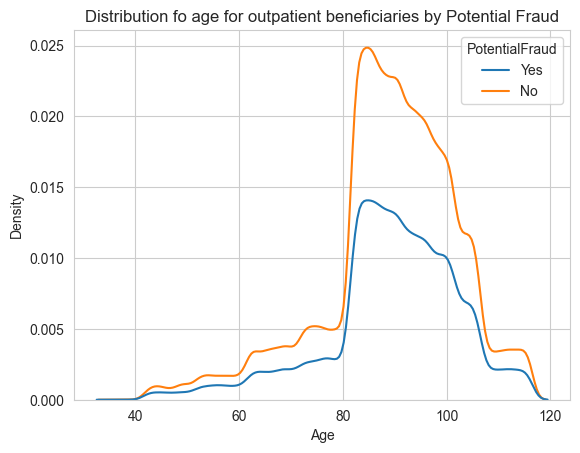

In [257]:
# Distribution of Age for inpatient beneficiaries by Potential fraud
sns.kdeplot(data = op_provider_claims, x = 'Age', hue = "PotentialFraud")
plt.title("Distribution fo age for outpatient beneficiaries by Potential Fraud")
plt.show()

#### Insights on Distribution of age for outpatient beneficiaries by Potential Fraud

- **Observation:**
  Both fraudulent and non-fraudulent outpatient claims are concentrated among elderly beneficiaries, especially between the ages of 80 to 90. The peak density for non-fraudulent claims is higher and more narrowly concentrated between 80 and 90 years. The distribution for fraudulent claims is flatter and more spread out, covering a wider age range (from ~60 to 100+) with a more noticeable tail in both younger and older age groups.

- **Interpretation:**
  Non-fraudulent claims are strongly associated with older patients (primarily 80–90), likely because genuine outpatient services increase with age and health decline. Fraudulent claims, on the other hand, are spread more evenly across a wider age range, suggesting Fraudsters may target or fabricate claims for beneficiaries of varied ages, not just the very old. This broader age range could indicate opportunistic or fabricated entries, not necessarily aligned with expected healthcare utilization patterns. The tail in the fraudulent curve at younger ages (60–70s) may suggest manipulation of claims among those who might not typically require frequent outpatient services.

### Number of fraudulent Claims Per Beneficiary

In [258]:
# Inpatient fraud claims per beneficiary
ip_bene_claims = fraud_inpatient_claims['BeneID'].value_counts().reset_index()
ip_bene_claims.columns = ['BeneID', 'IP_Claim_Count']

# Outpatient fraud claims per beneficiary
op_bene_claims = fraud_outpatient_claims['BeneID'].value_counts().reset_index()
op_bene_claims.columns = ['BeneID', 'OP_Claim_Count']

In [259]:
ip_bene_claims.head()

,BeneID,IP_Claim_Count
0,BENE62091,7
1,BENE119457,7
2,BENE134170,7
3,BENE72701,6
4,BENE119780,6


In [262]:
op_bene_claims.head()

,BeneID,OP_Claim_Count
0,BENE118316,28
1,BENE143400,27
2,BENE50335,22
3,BENE38076,22
4,BENE82442,22


In [263]:
# Combine op and ip bene
bene_claims = pd.merge(ip_bene_claims, op_bene_claims, on='BeneID', how='outer').fillna(0)

# Total claims
bene_claims['Total_Claims'] = bene_claims['IP_Claim_Count'] + bene_claims['OP_Claim_Count']
bene_claims.head()

,BeneID,IP_Claim_Count,OP_Claim_Count,Total_Claims
0,BENE100000,0.0,2.0,2.0
1,BENE100001,0.0,5.0,5.0
2,BENE100002,1.0,3.0,4.0
3,BENE100003,0.0,1.0,1.0
4,BENE100004,0.0,1.0,1.0


In [264]:
top_benes = bene_claims.sort_values(by='Total_Claims', ascending=False).head(10)
top_benes.head()

,BeneID,IP_Claim_Count,OP_Claim_Count,Total_Claims
10812,BENE118316,0.0,28.0,28.0
26429,BENE143400,0.0,27.0,27.0
15918,BENE126421,4.0,20.0,24.0
60830,BENE59303,2.0,21.0,23.0
64729,BENE66093,1.0,22.0,23.0


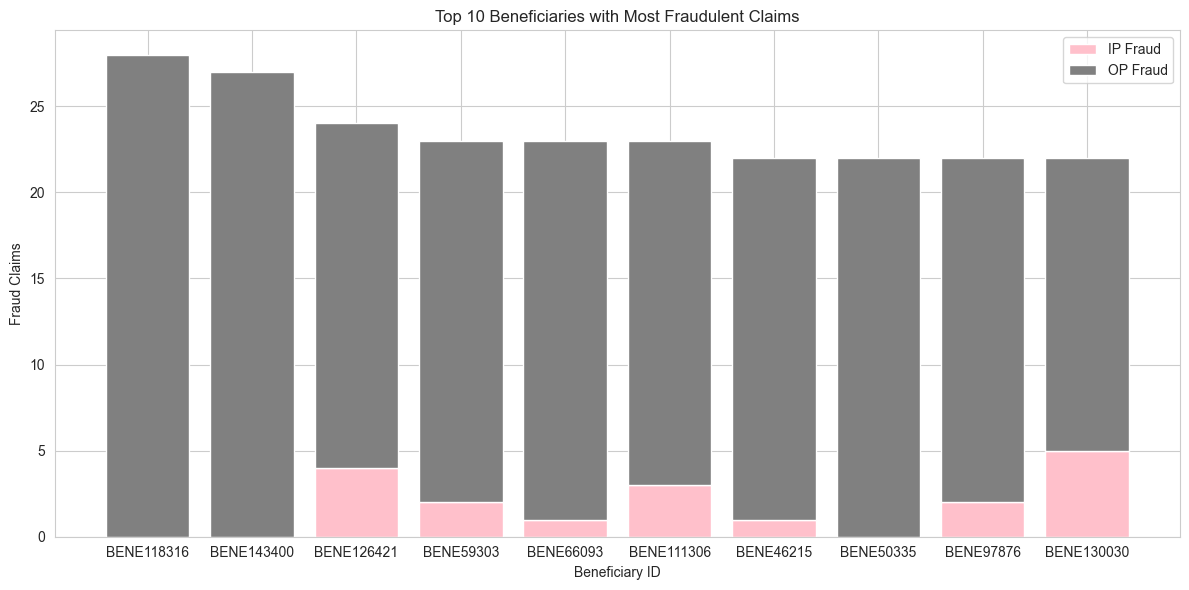

In [269]:
# Visualize Top 10 providers occuring fraudulent activities in both inpatient and outpatient claims
plt.figure(figsize=(12,6))
plt.bar(top_benes['BeneID'], top_benes['IP_Claim_Count'], label='IP Fraud', color='pink')
plt.bar(top_benes['BeneID'], top_benes['OP_Claim_Count'], bottom=top_benes['IP_Claim_Count'], label='OP Fraud', color='grey')
plt.title('Top 10 Beneficiaries with Most Fraudulent Claims')
plt.xlabel('Beneficiary ID')
plt.ylabel('Fraud Claims')
plt.legend()
plt.tight_layout()
plt.show()

#### Insights on Number of fraudulent claims per beneficiary

- **Observation:**
  All top 10 beneficiaries have made over 22 fraudulent claims. The dominant fraud type among all these top beneficiaries is Outpatient (OP) Fraud, shown in gray. Some beneficiaries, like BENE130030, BENE126421, and BENE111306, also show notable instances of Inpatient (IP) Fraud, represented in pink. BENE118316 and BENE143400 top the list with the highest total number of fraudulent claims (28 and 27), but all of these are OP frauds.

- **Interpretation:**
  Outpatient fraud is significantly more prevalent than inpatient fraud among high-fraud beneficiaries. A few individuals are involved in both types of fraud, indicating potential patterns of systemic abuse or organized fraudulent behavior. The fact that multiple beneficiaries have consistently high numbers of OP fraud claims may indicate Vulnerabilities or lack of strict monitoring in outpatient billing systems and Possible fraud rings or identity misuse leveraging outpatient services due to easier processing and lower scrutiny compared to inpatient claims. These high-risk beneficiaries should be flagged for investigation or auditing, particularly those showing mixed fraud types.

### Fraudulent claims by State and country

In [270]:
# Combine both IP and OP fraud data
fraud_all = pd.concat([fraud_inpatient_claims, fraud_outpatient_claims])

# Count frauds by State and County
fraud_geo = fraud_all.groupby(['State', 'County']).size().reset_index(name='Fraud_Claim_Count')
fraud_geo.head()

,State,County,Fraud_Claim_Count
0,1,0,31
1,1,10,59
2,1,20,5
3,1,30,15
4,1,40,3


In [271]:
# Combine all (fraud + non-fraud) claims
all_claims = pd.concat([inp_provider_claims, op_provider_claims])

# Count all claims by State and County
total_geo = all_claims.groupby(['State', 'County']).size().reset_index(name='Total_Claim_Count')
total_geo.head()

,State,County,Total_Claim_Count
0,1,0,56
1,1,10,360
2,1,20,74
3,1,30,23
4,1,40,59


In [272]:
# Merge
geo_comparison = pd.merge(total_geo, fraud_geo, on=['State', 'County'], how='left')

# Replace NaN fraud count with 0 (i.e., no fraud in that area)
geo_comparison['Fraud_Claim_Count'] = geo_comparison['Fraud_Claim_Count'].fillna(0)

# Calculate Fraud Rate (%)
geo_comparison['Fraud_Rate'] = (geo_comparison['Fraud_Claim_Count'] / geo_comparison['Total_Claim_Count']) * 100
geo_comparison.head()

,State,County,Total_Claim_Count,Fraud_Claim_Count,Fraud_Rate
0,1,0,56,31.0,55.357143
1,1,10,360,59.0,16.388889
2,1,20,74,5.0,6.756757
3,1,30,23,15.0,65.217391
4,1,40,59,3.0,5.084746


In [ ]:
# Create unique county label
geo_comparison['Country_State'] = geo_comparison['County'].astype(str) + ', ' + geo_comparison['State'].astype(str)
geo_comparison.head()

,State,County,Total_Claim_Count,Fraud_Claim_Count,Fraud_Rate,Country_State
0,1,0,56,31.0,55.357143,"0, 1"
1,1,10,360,59.0,16.388889,"10, 1"
2,1,20,74,5.0,6.756757,"20, 1"
3,1,30,23,15.0,65.217391,"30, 1"
4,1,40,59,3.0,5.084746,"40, 1"


In [287]:
top_countries = geo_comparison.sort_values(by='Fraud_Claim_Count', ascending=False).head(10)
top_countries.head()

,State,County,Total_Claim_Count,Fraud_Claim_Count,Fraud_Rate,Country_State
196,5,200,12300,8998.0,73.154472,"200, 5"
214,5,470,5087,4266.0,83.860822,"470, 5"
1805,33,590,4207,3681.0,87.497029,"590, 33"
207,5,400,4323,3589.0,83.021050,"400, 5"
1788,33,331,4057,3284.0,80.946512,"331, 33"


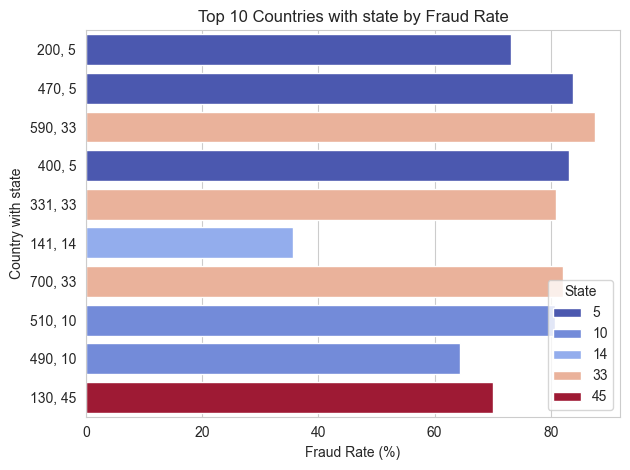

In [288]:
# Visualize fraudulent claims by state and country
sns.barplot(data=top_countries, x='Fraud_Rate', y='Country_State', hue='State', palette='coolwarm')
plt.title('Top 10 Countries with state by Fraud Rate')
plt.xlabel('Fraud Rate (%)')
plt.ylabel('Country with state')
plt.tight_layout()
plt.show()

#### Insights on fraud rate in country with state

- **Observation:**
  Fraud rates among the top 10 country-state combinations range from around 35% to just under 90%. The highest fraud rate is seen in the combination 590, 33 (almost 90%). State 5 appears three times, suggesting frequent fraud-related activity in this state. State 33 appears three times as well, also indicating it as a high-risk region. The combination 141, 14 has the lowest fraud rate (~35%) among the top 10, but it still indicates significant fraudulent activity compared to general expectations.

- **Interpretation:**
  The distribution suggests that certain states consistently have higher fraud rates, regardless of the country code they are paired with. States 5 and 33 appear to be key fraud-prone areas and should be flagged for deeper audits or policy interventions. While the fraud rates are not at 100% (unlike the previous plot), they are still alarmingly high, indicating systemic issues. Fraud might be driven by Regional networks of fraudulent providers or beneficiaries, Lack of enforcement or auditing in these specific states and Possibly socioeconomic or demographic factors unique to these areas.

In [ ]:
# Exporting Data for PowerBI
# inp_provider_claims.to_csv("D:\Data Analytics Project\Medicare Fraud Claims Analysis Project\Medicare Fraud Claims Analysis\Power bi Tables\inpatient_claims.csv")
# op_provider_claims.to_csv("D:\Data Analytics Project\Medicare Fraud Claims Analysis Project\Medicare Fraud Claims Analysis\Power bi Tables\outpatient_claims.csv")

### Power BI Dashboards

![Medicare Claims Fraud Overview](Power-BI-Dashboards/Medicare-Claims-Fraud-Overview.png)

![Provider-and-Physician-Analysis](Power-BI-Dashboards/Provider-and-Physician-Analysis.png)

![Diagnosis-and-Procedure-Pattern](Power-BI-Dashboards/Diagnosis-and-Procedure-Pattern.png)

![Geographic](Power-BI-Dashboards/Geographic-Fraud-Mapping.png)

![Beneficiary](Power-BI-Dashboards/Beneficiary-Risk-Profiling.png)